# Notebook to run basic `scanpy` QC and doublet detection with `scrublet` for SRA Project - PRJNA1127309

- **Developed by**: Srivalli Kolla

- **Created date** : 14 October, 2024

- **Modification date** : 23 October, 2024

- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**

Env : Scanpy(Python 3.12.4)

# Import sample_names

In [1]:
import anndata
import logging
import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scrublet as scr
import os
import time
import matplotlib.pyplot as plt
from statsmodels.robust.scale import mad as median_abs_deviation
from matplotlib import colors
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')
timestamp = time.strftime("%d_%m_%Y")

-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                 10.3.0
asttokens           NA
attr                23.2.0
cffi                1.16.0
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.2
decorator           5.1.1
defusedxml          0.7.1
distutils           3.12.4
django              5.0.6
executing           2.0.1
h5py                3.11.0
igraph              0.11.5
ipykernel           6.29.5
ipython_genutils    0.2.0
ipywidgets          8.1.3
jedi                0.19.1
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.43.0
louvain             0.8.2
matplotlib          3.8.4
mpl_toolkits        NA
natsort             8.4.0
numba               0.60.0
numexpr             2.10.1
numpy               1.26.4
packaging           24.1
pandas              2.2.2
parso               0.8.4
patsy  

# Import sample_names

In [3]:
path = '../ncbi_sra/data'
files = ['SRR29504963.h5ad',
'SRR29504964.h5ad',
'SRR29504965.h5ad',
'SRR29504966.h5ad',
'SRR29504967.h5ad',
'SRR29504968.h5ad',
'SRR29504969.h5ad',
'SRR29504970.h5ad',
'SRR29504971.h5ad',
'SRR29504972.h5ad',
'SRR29504973.h5ad',
'SRR29504974.h5ad',
'SRR29504975.h5ad',
'SRR29504976.h5ad',
'SRR29504977.h5ad',
'SRR29504978.h5ad',
'SRR29504979.h5ad',
'SRR29504980.h5ad',
'SRR29504981.h5ad',
'SRR29504982.h5ad',
'SRR29504983.h5ad',
'SRR29504984.h5ad',
'SRR29504985.h5ad',
'SRR29504986.h5ad',
'SRR29504987.h5ad',
'SRR29504988.h5ad',
'SRR29504989.h5ad',
'SRR29504990.h5ad',
'SRR29504991.h5ad',
'SRR29504992.h5ad',
'SRR29504993.h5ad',
'SRR29504994.h5ad',
'SRR29504995.h5ad',
'SRR29504996.h5ad',
'SRR29504997.h5ad',
'SRR29504998.h5ad',
'SRR29504999.h5ad',
'SRR29505000.h5ad',
'SRR29505001.h5ad',
'SRR29505002.h5ad',
'SRR29505003.h5ad',
'SRR29505004.h5ad',
'SRR29505005.h5ad',
'SRR29505006.h5ad',
'SRR29505007.h5ad',
'SRR29505008.h5ad',
'SRR29505009.h5ad',
'SRR29505010.h5ad',
'SRR29505011.h5ad',
'SRR29505012.h5ad',
'SRR29505013.h5ad',
'SRR29505014.h5ad',
'SRR29336105.h5ad',
'SRR29336106.h5ad',
'SRR29336107.h5ad',
'SRR29336108.h5ad',
'SRR29336109.h5ad',
'SRR29336110.h5ad',
'SRR29336111.h5ad']

In [4]:
adata_combined = None
vars_combined = []

for file in files:
    file_path = os.path.join(path, file)
    
    try:

        adata = sc.read_h5ad(file_path)

        sample_name = os.path.basename(file_path).split('.')[0]
        adata.obs['sample_name'] = sample_name


        sc.pp.filter_cells(adata, min_counts=10)
        sc.pp.filter_genes(adata, min_counts=10)


        adata.var_names = adata.var_names.str.split('.').str[0]
        adata.var_names = [f"{name}_{sample_name}" for name in adata.var_names]

        vars_combined.extend(adata.var_names)


        if adata_combined is None:
            adata_combined = adata
        else:
            adata_combined = sc.concat([adata_combined, adata], join='outer', index_unique='-')

        print(f"Successfully read and concatenated: {file}")

    except Exception as e:
        print(f"Error reading {file}: {e}")

unique_var_names = pd.Series(vars_combined).unique()
adata_combined.var_names = unique_var_names[:adata_combined.n_vars] 
adata_combined

filtered out 6794802 cells that have less than 10 counts
filtered out 63082 genes that are detected in less than 10 counts
Successfully read and concatenated: SRR29504963.h5ad
filtered out 6794819 cells that have less than 10 counts
filtered out 63085 genes that are detected in less than 10 counts
Successfully read and concatenated: SRR29504964.h5ad
filtered out 6794822 cells that have less than 10 counts
filtered out 63086 genes that are detected in less than 10 counts
Successfully read and concatenated: SRR29504965.h5ad
filtered out 6794809 cells that have less than 10 counts
filtered out 63085 genes that are detected in less than 10 counts
Successfully read and concatenated: SRR29504966.h5ad
filtered out 6794818 cells that have less than 10 counts
filtered out 63085 genes that are detected in less than 10 counts
Successfully read and concatenated: SRR29504967.h5ad
filtered out 6794821 cells that have less than 10 counts
filtered out 63086 genes that are detected in less than 10 coun

AnnData object with n_obs × n_vars = 4210 × 693
    obs: 'sample_name', 'n_counts'

In [5]:
adata_combined

AnnData object with n_obs × n_vars = 4210 × 693
    obs: 'sample_name', 'n_counts'

In [6]:
adata_combined.obs

,sample_name,n_counts
AACGGGAAGGCGAAGA-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,SRR29504963,78
AATGAAGGTGACTAAA-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,SRR29504963,195
ACAAGCTAGGAAACAA-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,SRR29504963,57
ACCTGAAGTCAGGAGT-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,SRR29504963,160
AGATAGAAGTTTGGAG-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,SRR29504963,314
...,...,...
TGGATCACAAGGTCAG-1,SRR29505014,23
TGGATCATCTGAGGTC-1,SRR29505014,21
TGTGAGTGTGTGTGTT-1,SRR29505014,11
TTACAGGAGTGAGCCA-1,SRR29505014,17


In [7]:
adata_combined.var

""
ENSG00000145934_SRR29504963
ENSG00000146555_SRR29504963
ENSG00000174469_SRR29504963
ENSG00000288098_SRR29504963
ENSG00000146555_SRR29504964
...
ENSG00000289740_SRR29505013
ENSG00000152208_SRR29505014
ENSG00000188107_SRR29505014
ENSG00000174469_SRR29505014


In [8]:
adata_combined.obs['sample_name'].value_counts()

sample_name
SRR29505004    278
SRR29505003    276
SRR29505005    254
SRR29505006    253
SRR29505013     91
SRR29505014     86
SRR29505001     84
SRR29505000     82
SRR29505002     82
SRR29504991     81
SRR29504999     81
SRR29504984     80
SRR29504998     80
SRR29505011     79
SRR29504963     78
SRR29504973     75
SRR29505012     73
SRR29504981     72
SRR29504983     71
SRR29504966     71
SRR29504982     70
SRR29504992     67
SRR29504997     65
SRR29505008     65
SRR29504980     65
SRR29504989     65
SRR29504974     63
SRR29504967     62
SRR29504972     62
SRR29504976     61
SRR29504964     61
SRR29504977     61
SRR29504995     61
SRR29505007     60
SRR29504993     60
SRR29504969     60
SRR29504968     59
SRR29504978     59
SRR29505010     58
SRR29504975     58
SRR29504965     58
SRR29504996     58
SRR29505009     58
SRR29504994     58
SRR29504971     57
SRR29504990     57
SRR29504979     52
SRR29504987     51
SRR29504986     51
SRR29504970     50
SRR29504988     46
SRR29504985     45


## Doublet score prediction

In [9]:
sc.pp.filter_cells(adata_combined, min_counts=1)
sc.pp.filter_genes(adata_combined, min_counts=1)
adata_combined

filtered out 2387 cells that have less than 1 counts


AnnData object with n_obs × n_vars = 1823 × 693
    obs: 'sample_name', 'n_counts'
    var: 'n_counts'

In [10]:
scrub = scr.Scrublet(adata_combined.X)

doublet_scores, predicted_doublets = scrub.scrub_doublets()
            
adata_combined.obs['doublet_scores'] = doublet_scores
adata_combined.obs['predicted_doublets'] = predicted_doublets

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 0.2 seconds


In [11]:
adata_combined.obs

,sample_name,n_counts,doublet_scores,predicted_doublets
AATGAAGGTGACTAAA-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,SRR29504963,3.0,0.076923,False
ACAAGCTAGGAAACAA-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,SRR29504963,2.0,0.033557,False
ACCTGAAGTCAGGAGT-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,SRR29504963,2.0,0.033557,False
AGATAGAAGTTTGGAG-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,SRR29504963,2.0,0.057432,False
AGGATAATCGCTTGAA-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,SRR29504963,1.0,0.054187,False
...,...,...,...,...
GTGACGCAGGGAGAAT-1,SRR29505014,4.0,0.000867,False
GTTAGTGTCTCATGGG-1,SRR29505014,1.0,0.000867,False
GTTCATTTCTGGTGGT-1,SRR29505014,1.0,0.000867,False
GTTGTAGGTGACTAAA-1,SRR29505014,3.0,0.000867,False


### Checking the count and percentage of Doublets - sample_name level

In [12]:
doub_tab = pd.crosstab(adata_combined.obs['sample_name'],adata_combined.obs['predicted_doublets'])
doub_tab.sum()

predicted_doublets
False    1823
dtype: int64

In [13]:
true_doublets = adata_combined.obs['predicted_doublets'] == True
true_doublets_count = true_doublets.sum()

true_doublets_percentage = (true_doublets_count / len(adata_combined.obs)) * 100

true_doublets_count ,true_doublets_percentage

(0, 0.0)

### Saving raw data

In [14]:
sample_name_object = adata_combined.copy()
sample_name_object

AnnData object with n_obs × n_vars = 1823 × 693
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets'
    var: 'n_counts'

## Compute QC stats

In [15]:
sample_name_object.shape

(1823, 693)

### Labelling Mt and Ribo genes

In [16]:
sample_name_object.var

,n_counts
ENSG00000145934_SRR29504963,10.0
ENSG00000146555_SRR29504963,14.0
ENSG00000174469_SRR29504963,13.0
ENSG00000288098_SRR29504963,11.0
ENSG00000146555_SRR29504964,14.0
...,...
ENSG00000289740_SRR29505013,11.0
ENSG00000152208_SRR29505014,13.0
ENSG00000188107_SRR29505014,10.0
ENSG00000174469_SRR29505014,10.0


In [17]:
sample_name_object.var.index = sample_name_object.var.index.str.split('_').str[0]
sample_name_object.var

,n_counts
ENSG00000145934,10.0
ENSG00000146555,14.0
ENSG00000174469,13.0
ENSG00000288098,11.0
ENSG00000146555,14.0
...,...
ENSG00000289740,11.0
ENSG00000152208,13.0
ENSG00000188107,10.0
ENSG00000174469,10.0


In [18]:
sample_name_object.var['ensembl'] = sample_name_object.var.index
sample_name_object.var 

,n_counts,ensembl
ENSG00000145934,10.0,ENSG00000145934
ENSG00000146555,14.0,ENSG00000146555
ENSG00000174469,13.0,ENSG00000174469
ENSG00000288098,11.0,ENSG00000288098
ENSG00000146555,14.0,ENSG00000146555
...,...,...
ENSG00000289740,11.0,ENSG00000289740
ENSG00000152208,13.0,ENSG00000152208
ENSG00000188107,10.0,ENSG00000188107
ENSG00000174469,10.0,ENSG00000174469


### Ensembl annotations

In [19]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("ensembl_gene_id")

In [20]:
annot.head()

,external_gene_name,start_position,end_position,chromosome_name
ensembl_gene_id,,,,
ENSG00000210049,MT-TF,577,647,MT
ENSG00000211459,MT-RNR1,648,1601,MT
ENSG00000210077,MT-TV,1602,1670,MT
ENSG00000210082,MT-RNR2,1671,3229,MT
ENSG00000209082,MT-TL1,3230,3304,MT


In [21]:
sample_name_object.var

,n_counts,ensembl
ENSG00000145934,10.0,ENSG00000145934
ENSG00000146555,14.0,ENSG00000146555
ENSG00000174469,13.0,ENSG00000174469
ENSG00000288098,11.0,ENSG00000288098
ENSG00000146555,14.0,ENSG00000146555
...,...,...
ENSG00000289740,11.0,ENSG00000289740
ENSG00000152208,13.0,ENSG00000152208
ENSG00000188107,10.0,ENSG00000188107
ENSG00000174469,10.0,ENSG00000174469


In [22]:
sample_name_object.var['gene_name'] = sample_name_object.var.index.map(annot['external_gene_name'])
sample_name_object.var.index =sample_name_object.var['gene_name'] 
sample_name_object.var

,n_counts,ensembl,gene_name
gene_name,,,
TENM2,10.0,ENSG00000145934,TENM2
SDK1,14.0,ENSG00000146555,SDK1
CNTNAP2,13.0,ENSG00000174469,CNTNAP2
NaN,11.0,ENSG00000288098,NaN
SDK1,14.0,ENSG00000146555,SDK1
...,...,...,...
TALAM1,11.0,ENSG00000289740,TALAM1
GRID2,13.0,ENSG00000152208,GRID2
EYS,10.0,ENSG00000188107,EYS


In [23]:
sample_name_object.var['mt'] = sample_name_object.var_names.str.startswith('MT-') 
sample_name_object.var['ribo'] = sample_name_object.var_names.str.startswith(("RPS","RPL"))
sample_name_object.var

,n_counts,ensembl,gene_name,mt,ribo
gene_name,,,,,
TENM2,10.0,ENSG00000145934,TENM2,False,False
SDK1,14.0,ENSG00000146555,SDK1,False,False
CNTNAP2,13.0,ENSG00000174469,CNTNAP2,False,False
NaN,11.0,ENSG00000288098,NaN,NaN,NaN
SDK1,14.0,ENSG00000146555,SDK1,False,False
...,...,...,...,...,...
TALAM1,11.0,ENSG00000289740,TALAM1,False,False
GRID2,13.0,ENSG00000152208,GRID2,False,False
EYS,10.0,ENSG00000188107,EYS,False,False


In [24]:
ribo_counts = sample_name_object.var['ribo'].value_counts()

mt_counts = sample_name_object.var['mt'].value_counts()

print("Counts of Ribosomal (ribo) Genes:")
print("False:", ribo_counts.get(False, 0))
print("True:", ribo_counts.get(True, 0))
print("\nCounts of Mitochondrial (mt) Genes:")
print("False:", mt_counts.get(False, 0))
print("True:", mt_counts.get(True, 0))

Counts of Ribosomal (ribo) Genes:
False: 613
True: 1

Counts of Mitochondrial (mt) Genes:
False: 614
True: 0


In [25]:
sample_name_object.var['mt'] = sample_name_object.var['mt'].fillna(False)
sample_name_object.var['ribo'] = sample_name_object.var['ribo'].fillna(False)

/tmp/ipykernel_487122/2873467954.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sample_name_object.var['mt'] = sample_name_object.var['mt'].fillna(False)
/tmp/ipykernel_487122/2873467954.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sample_name_object.var['ribo'] = sample_name_object.var['ribo'].fillna(False)


In [26]:
print(sample_name_object.var[['mt', 'ribo']].head())

              mt   ribo
gene_name              
TENM2      False  False
SDK1       False  False
CNTNAP2    False  False
NaN        False  False
SDK1       False  False


### Calculating QC metrics per cell

In [27]:
# Check the shape and features of the AnnData object
print(sample_name_object)
print(sample_name_object.var_names)
print(sample_name_object.n_vars)
print(sample_name_object.n_obs)

AnnData object with n_obs × n_vars = 1823 × 693
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets'
    var: 'n_counts', 'ensembl', 'gene_name', 'mt', 'ribo'
Index([    'TENM2',      'SDK1',   'CNTNAP2',         nan,      'SDK1',
       'LINC02055',         nan,         nan,  'PKN2-AS1',         nan,
       ...
               nan,      'SDK1',         nan,   'GALNTL6',       'EYS',
          'TALAM1',     'GRID2',       'EYS',   'CNTNAP2',    'TALAM1'],
      dtype='object', name='gene_name', length=693)
693
1823


In [28]:
sc.pp.calculate_qc_metrics(sample_name_object,inplace = True)

In [29]:
sample_name_object

AnnData object with n_obs × n_vars = 1823 × 693
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_counts', 'ensembl', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

## Sex covariate analysis

### Chr Y genes calculation

In [30]:
sample_name_object.var['gene_name'] = sample_name_object.var['ensembl'].map(annot['external_gene_name'])
sample_name_object.var['chromosome'] = sample_name_object.var['ensembl'].map(annot['chromosome_name'])

In [31]:
sample_name_object.var

,n_counts,ensembl,gene_name,mt,ribo,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,chromosome
gene_name,,,,,,,,,,,,
TENM2,10.0,ENSG00000145934,TENM2,False,False,9,0.005485,0.005470,99.506308,10.0,2.397895,5
SDK1,14.0,ENSG00000146555,SDK1,False,False,14,0.007680,0.007650,99.232035,14.0,2.708050,7
CNTNAP2,13.0,ENSG00000174469,CNTNAP2,False,False,12,0.007131,0.007106,99.341744,13.0,2.639057,7
NaN,11.0,ENSG00000288098,NaN,False,False,11,0.006034,0.006016,99.396599,11.0,2.484907,X
SDK1,14.0,ENSG00000146555,SDK1,False,False,13,0.007680,0.007650,99.286890,14.0,2.708050,7
...,...,...,...,...,...,...,...,...,...,...,...,...
TALAM1,11.0,ENSG00000289740,TALAM1,False,False,11,0.006034,0.006016,99.396599,11.0,2.484907,11
GRID2,13.0,ENSG00000152208,GRID2,False,False,13,0.007131,0.007106,99.286890,13.0,2.639057,4
EYS,10.0,ENSG00000188107,EYS,False,False,10,0.005485,0.005470,99.451454,10.0,2.397895,6


In [32]:
chrY_genes = sample_name_object.var['chromosome'] == "Y"
chrY_genes

gene_name
TENM2      False
SDK1       False
CNTNAP2    False
NaN        False
SDK1       False
           ...  
TALAM1     False
GRID2      False
EYS        False
CNTNAP2    False
TALAM1     False
Name: chromosome, Length: 693, dtype: bool

In [33]:
sample_name_object.obs['percent_chrY'] = np.sum(
    sample_name_object[:, chrY_genes].X, axis = 1) / np.sum(sample_name_object.X, axis = 1) * 100

In [34]:
sample_name_object

AnnData object with n_obs × n_vars = 1823 × 693
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_chrY'
    var: 'n_counts', 'ensembl', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'chromosome'

### XIST counts

In [35]:
sample_name_object.var_names

Index([    'TENM2',      'SDK1',   'CNTNAP2',         nan,      'SDK1',
       'LINC02055',         nan,         nan,  'PKN2-AS1',         nan,
       ...
               nan,      'SDK1',         nan,   'GALNTL6',       'EYS',
          'TALAM1',     'GRID2',       'EYS',   'CNTNAP2',    'TALAM1'],
      dtype='object', name='gene_name', length=693)

In [36]:
valid_var_names = sample_name_object.var_names[~sample_name_object.var_names.isna()]

xist_genes = valid_var_names[valid_var_names.str.match('XIST')]
xist_genes

Index([], dtype='object', name='gene_name')

## Calculate cell cycle scores

### Downloading the list of cell cycle genes

In [37]:
!if [ ! -f ../ncbi_sra/data/regev_lab_cell_cycle_genes.txt ]; then curl -o ../ncbi_sra/data/regev_lab_cell_cycle_genes.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

### Marking cell cycle genes

#### Steps followed

1. Loading genes and captilizing 
2. Printing the length of cell cycle genes list
3. Split genes into 2 lists (#First 43 genes,#Gene 43 to end)
4. Filtering cell cycle genes only if present in processed_gene_names
5. Print the list of cell cycle genes observed in our data

In [38]:
cell_cycle_genes = [x.strip() for x in open('../ncbi_sra/data/regev_lab_cell_cycle_genes.txt')]
#cell_cycle_genes = [gene.capitalize() for gene in cell_cycle_genes]
print(len(cell_cycle_genes))

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_name_object.var_names]
print(len(cell_cycle_genes))

97
0


In [39]:
cell_cycle_genes

[]

## Data visualization

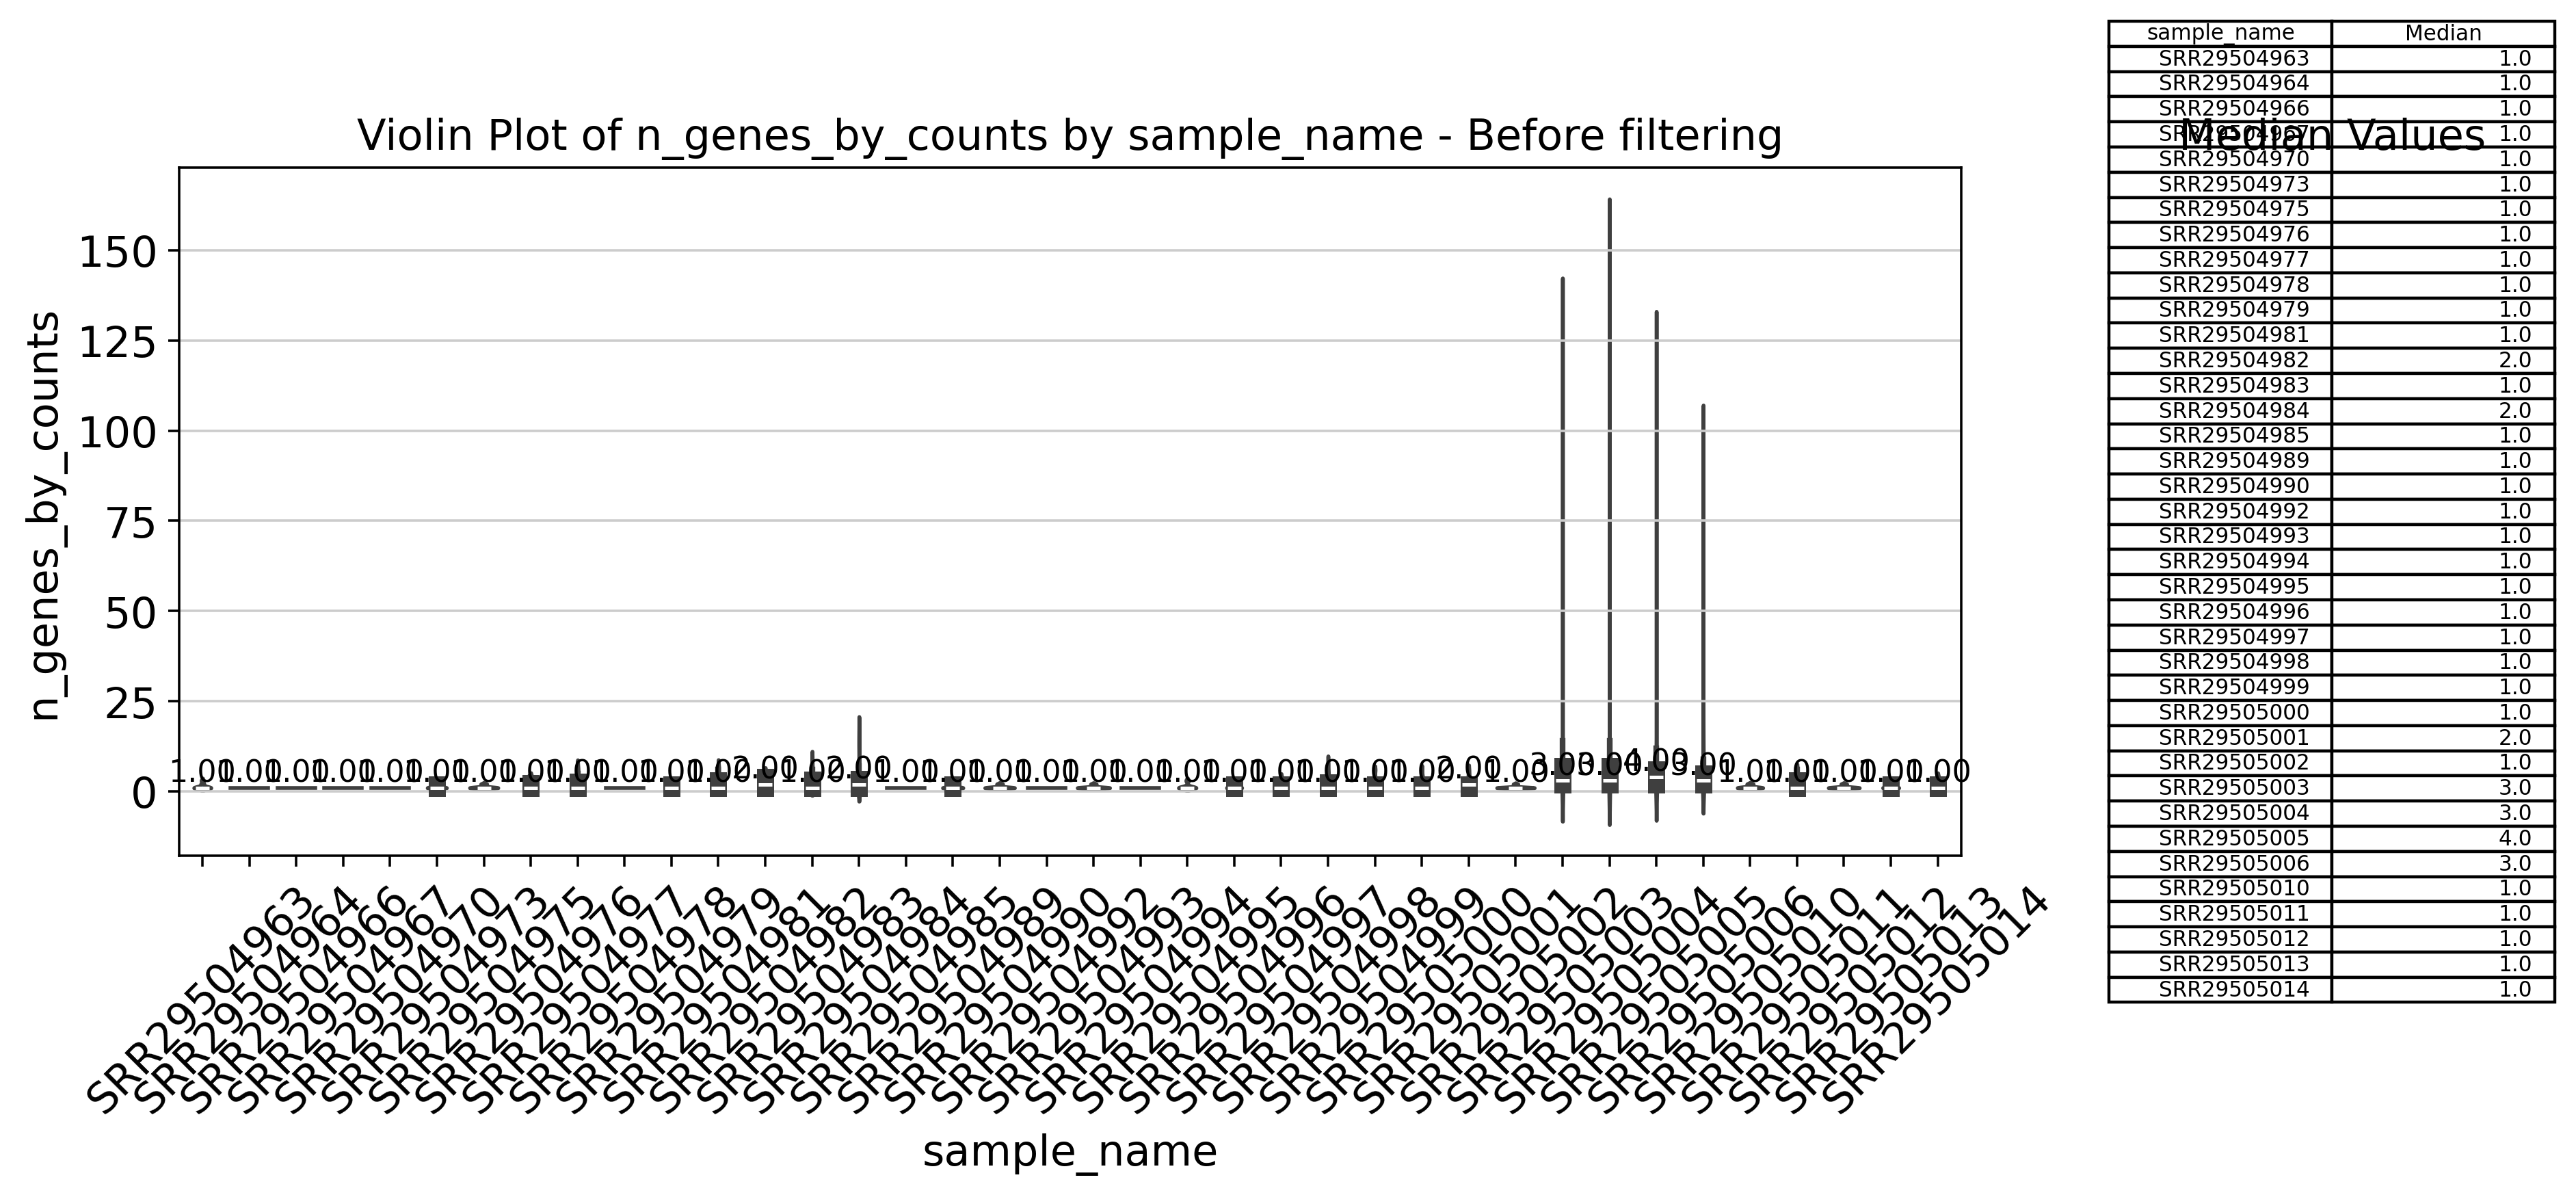

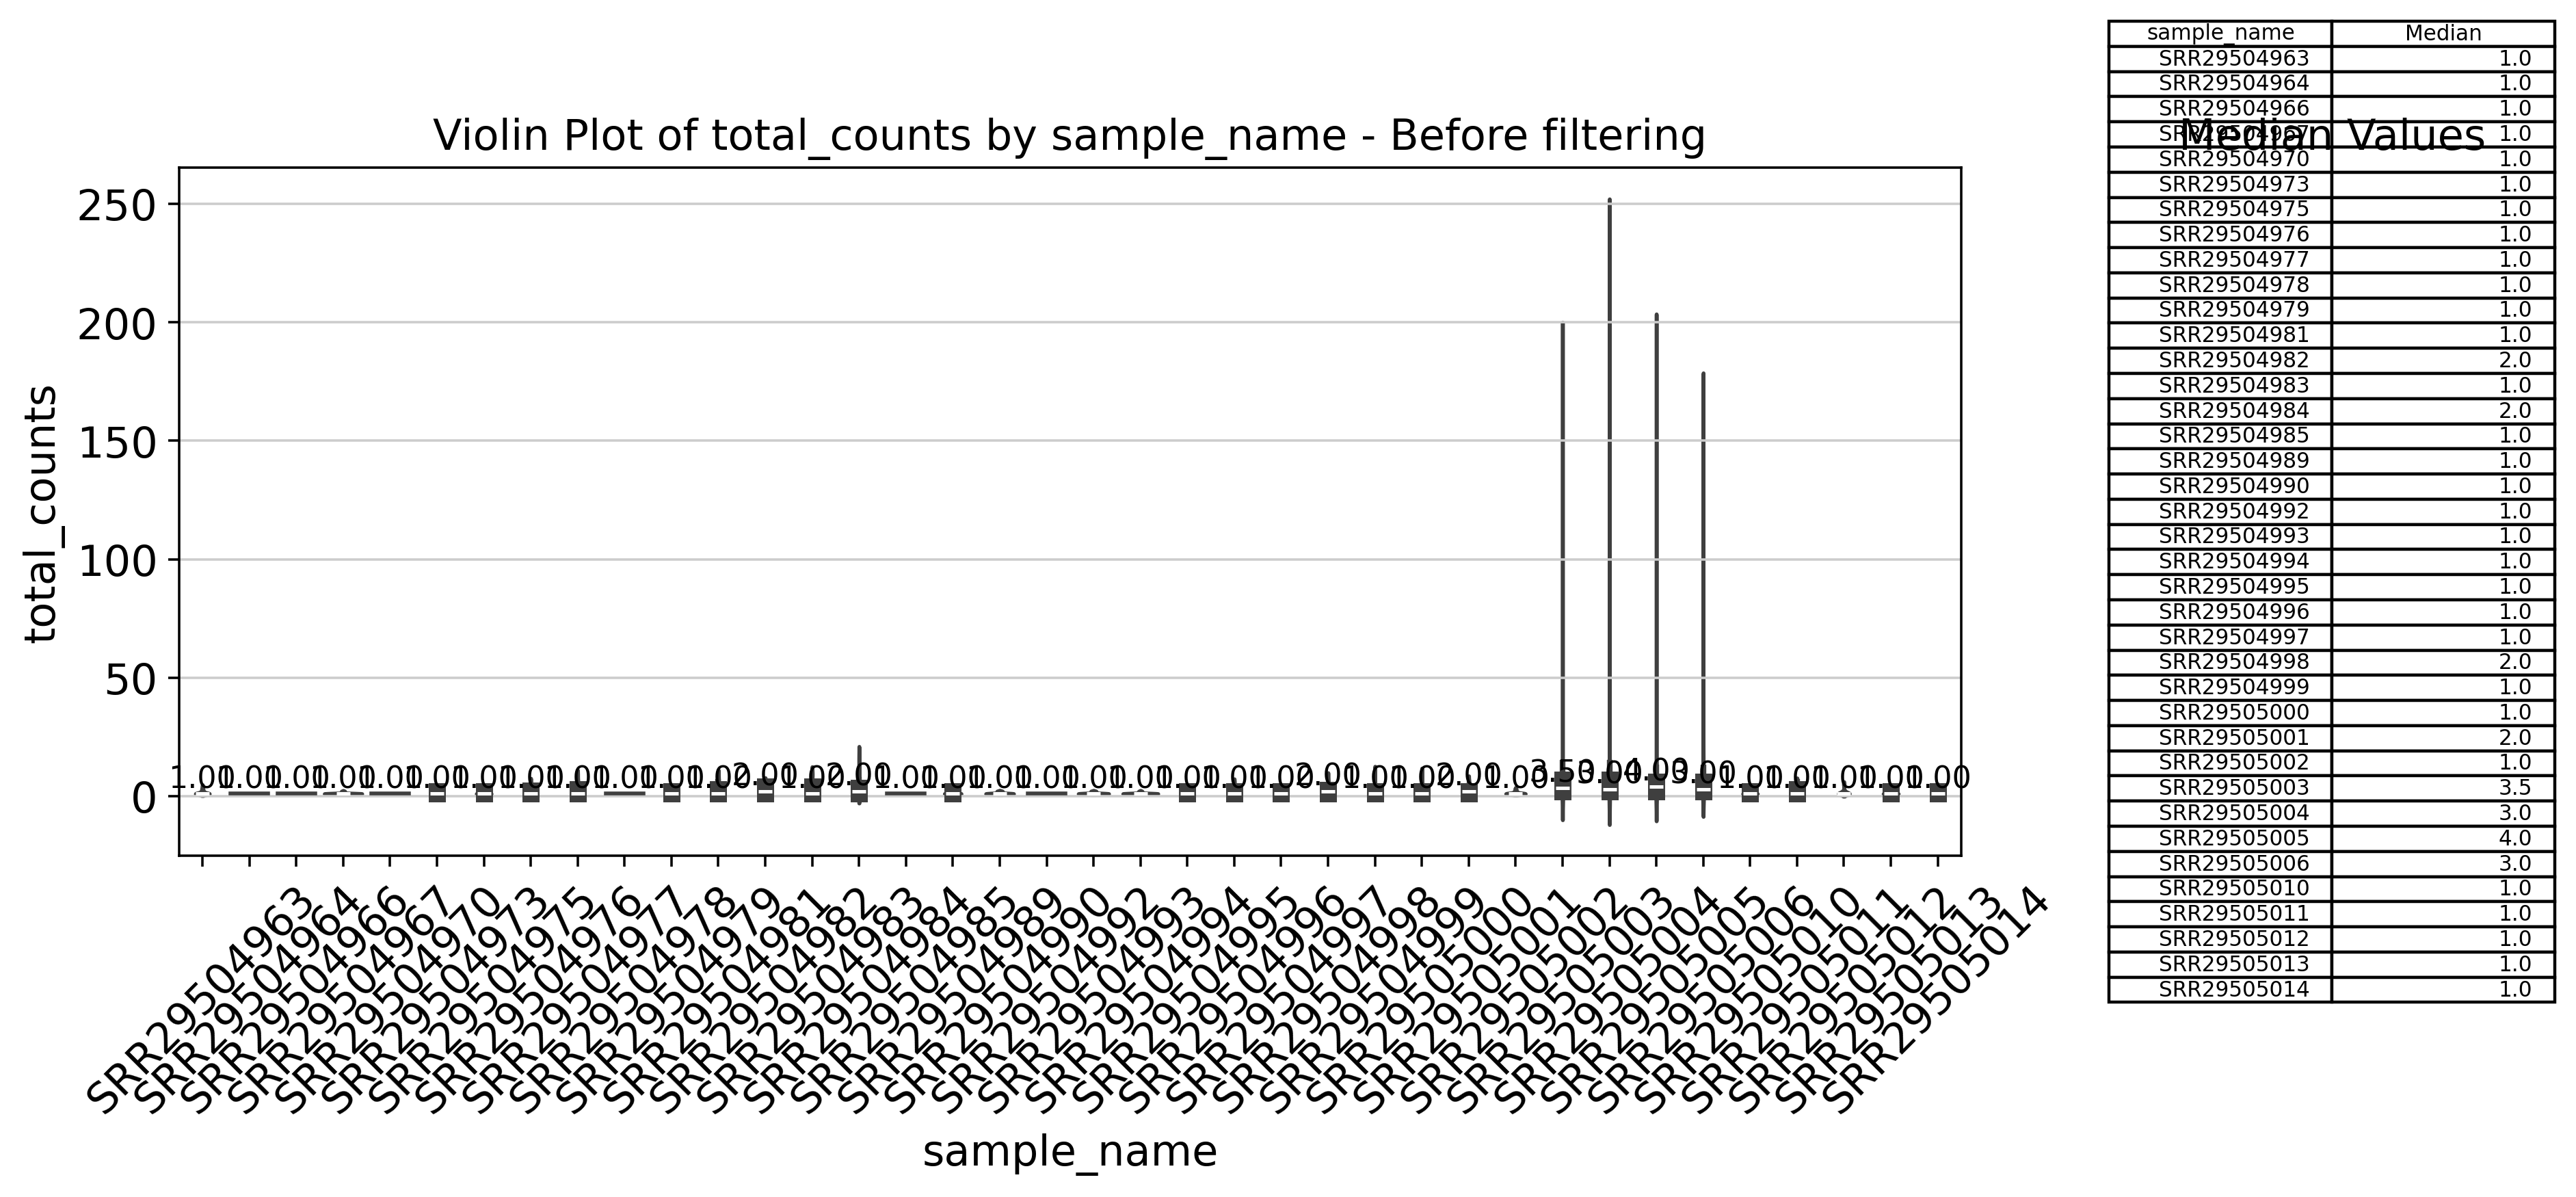

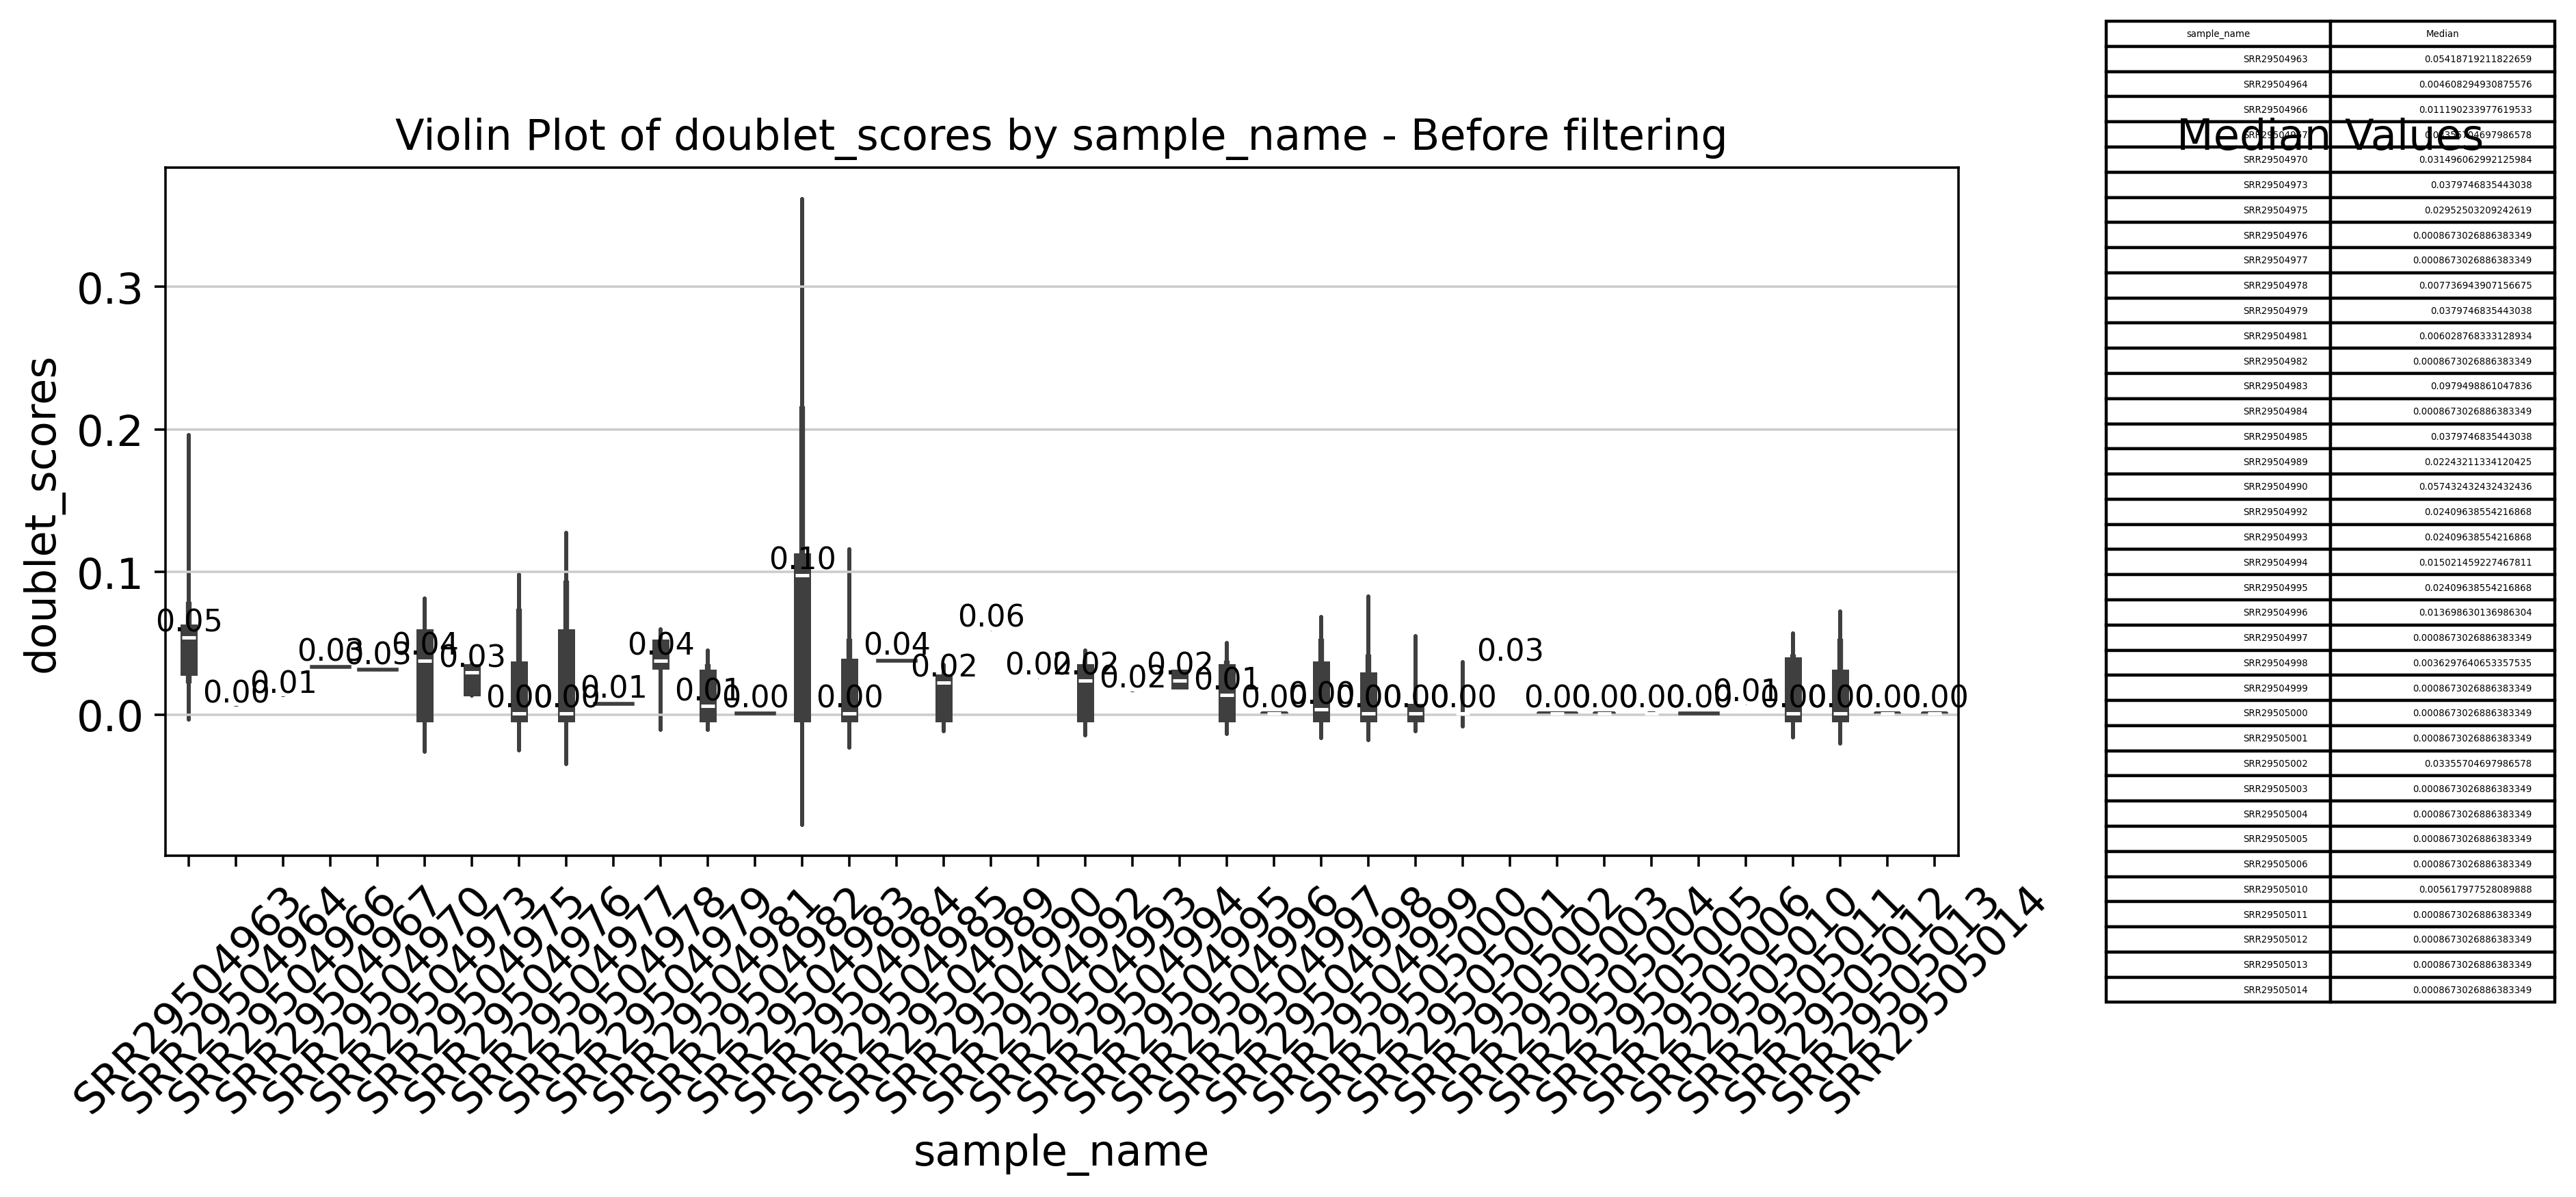

In [40]:
variables = 'n_genes_by_counts', 'total_counts', 'doublet_scores'

for var in variables:

    fig, ax = plt.subplots(figsize=(12, 6), ncols=2, gridspec_kw={'width_ratios': [4, 1]})

    sb.violinplot(data=sample_name_object.obs,x = 'sample_name' , y=var, ax=ax[0])
   
    medians = sample_name_object.obs.groupby('sample_name')[var].median()

    for sample_name, median in medians.items():
        ax[0].text(sample_name, median, f'{median:.2f}', ha='center', va='bottom', color='black', fontsize=10)
    
    ax[0].set_title(f'Violin Plot of {var} by sample_name - Before filtering')
    ax[0].set_xlabel('sample_name')
    ax[0].set_ylabel(var)
    ax[0].tick_params(axis='x', rotation=45)

    median_df = pd.DataFrame({'sample_name': medians.index, 'Median': medians.values})

    ax[1].axis('off')
    ax[1].table(cellText=median_df.values, colLabels=median_df.columns, loc='center')
    ax[1].set_title('Median Values')
    
    plt.tight_layout()
    plt.show()


### Visualization of qc metrics

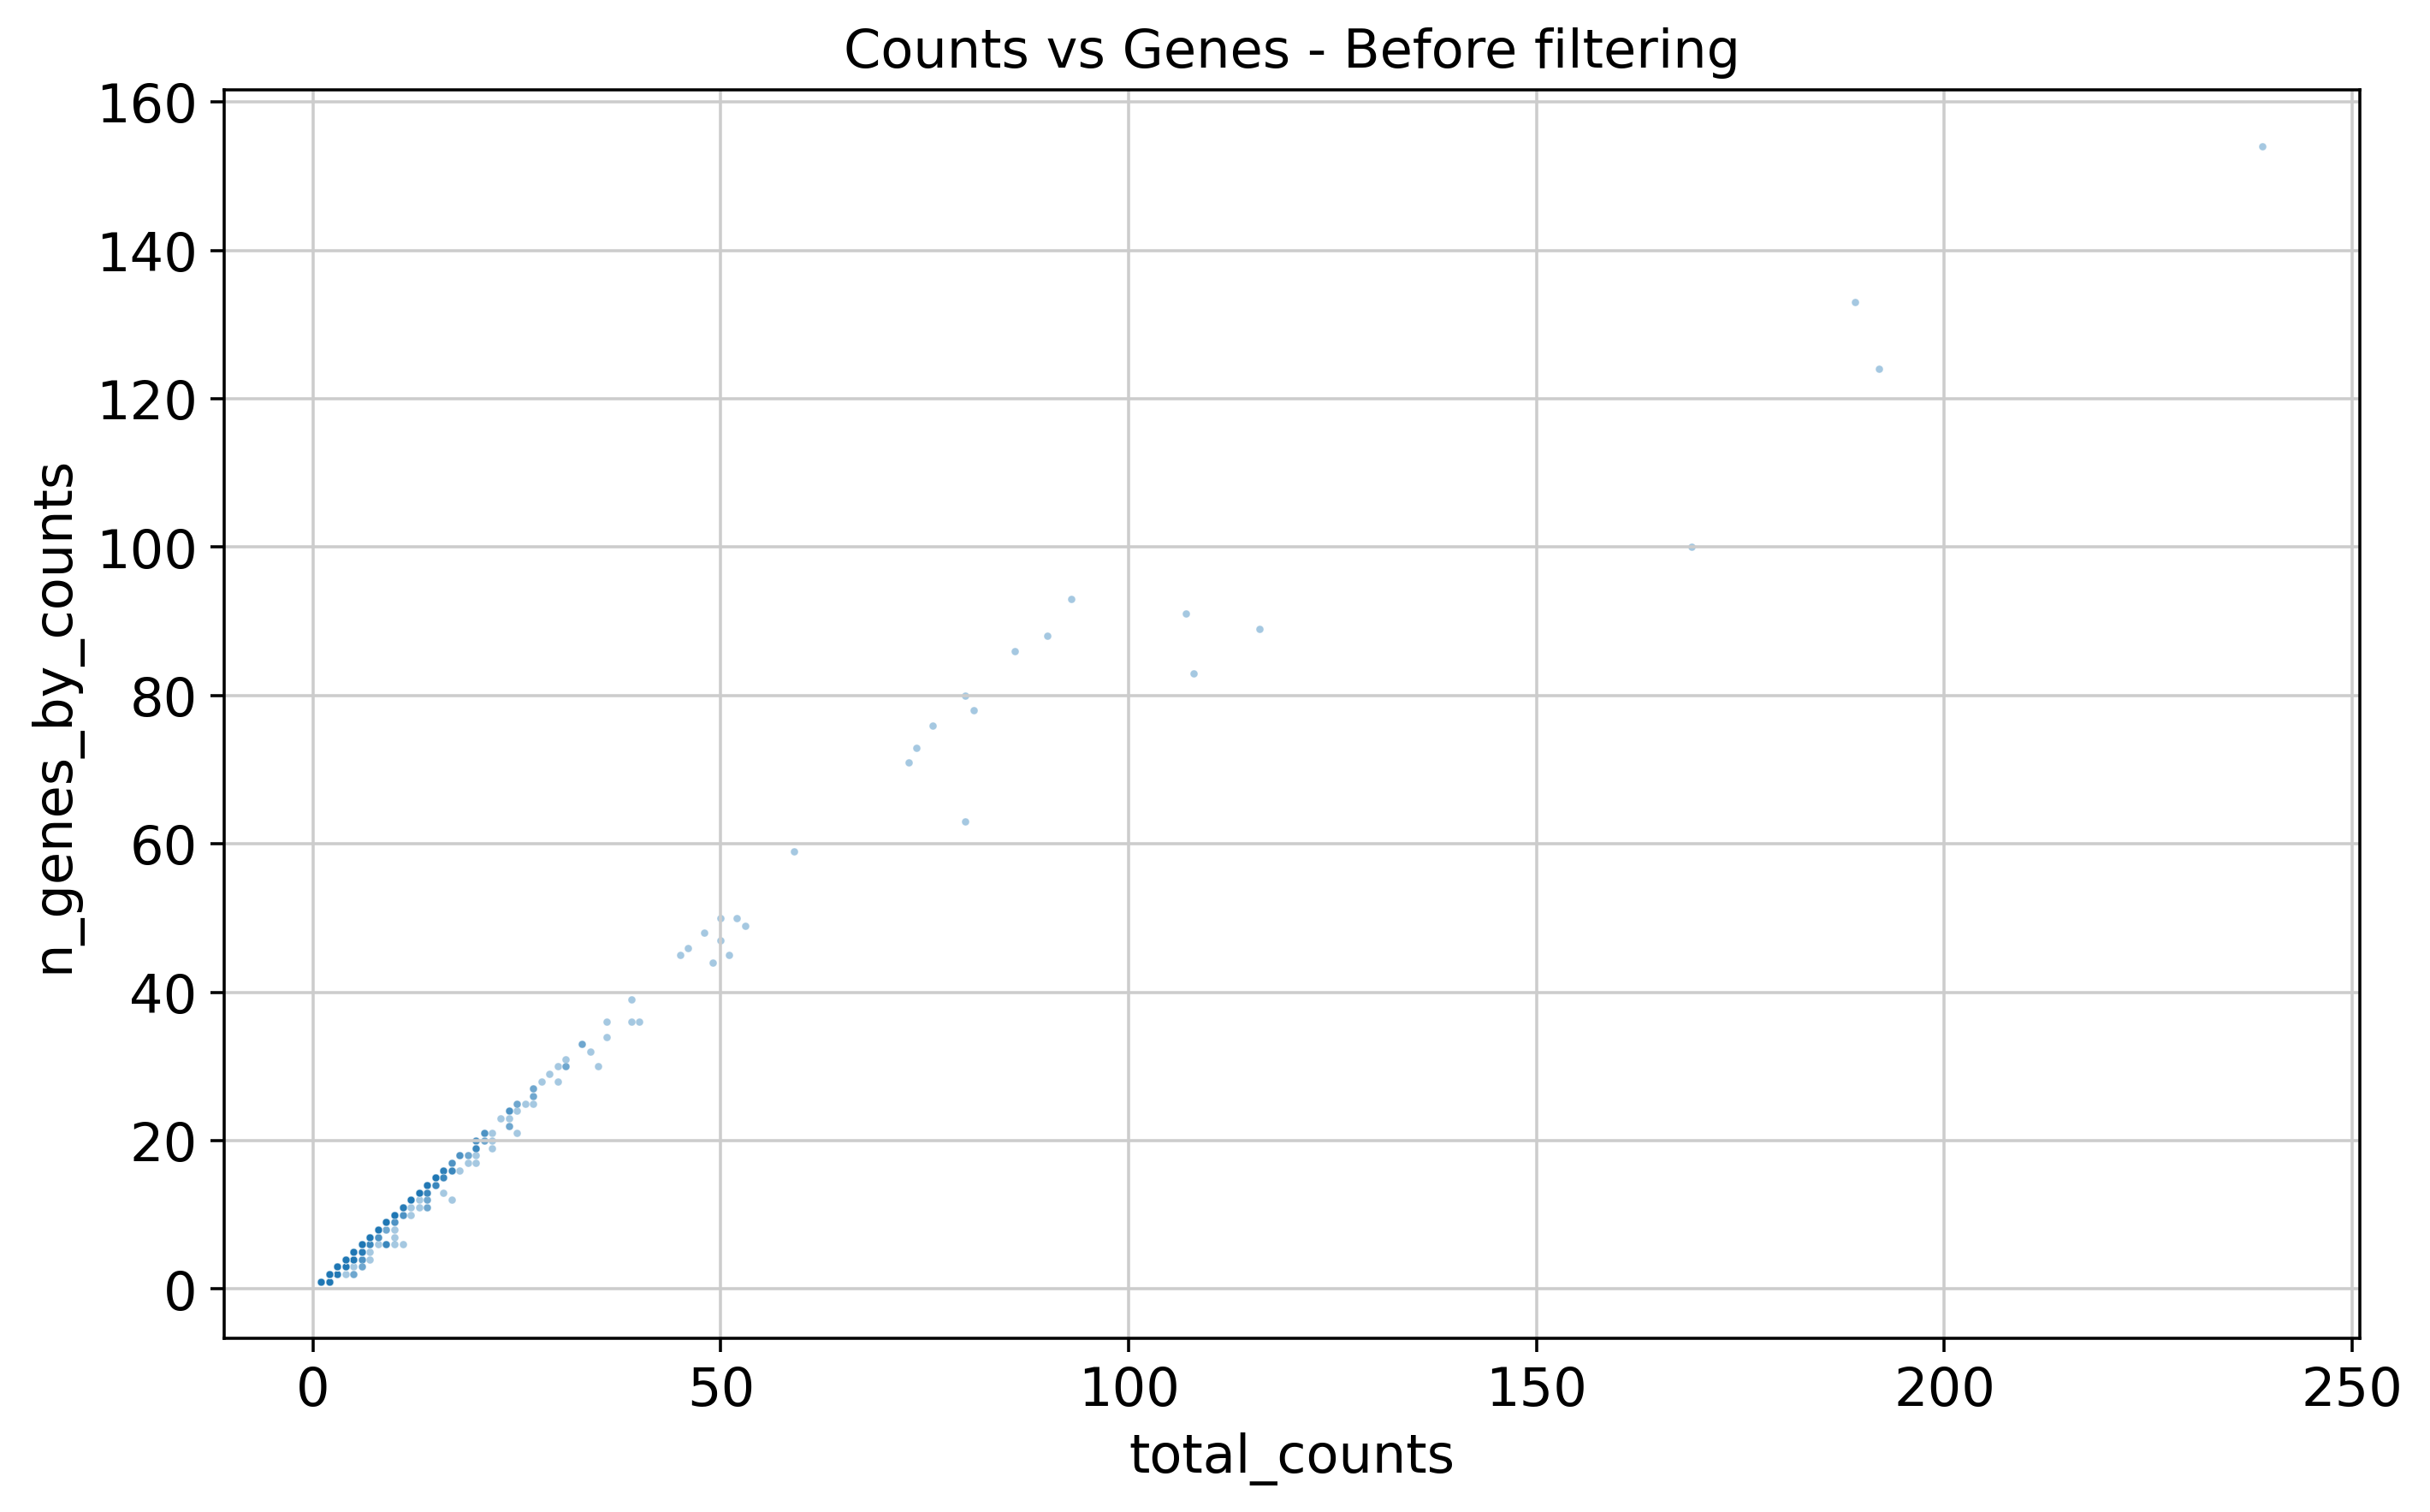

In [41]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=sample_name_object.obs, x='total_counts', y='n_genes_by_counts' , alpha = 0.4, s=4)
#plt.xticks(range(0, int(max(sample_name_object.obs['total_counts'])) + 1, 3000),rotation=45, fontsize = 10)
#plt.yticks(range(0, int(max(sample_name_object.obs['n_genes_by_counts'])) + 1, 1000),fontsize = 10)
plt.title(f'Counts vs Genes - Before filtering')
plt.show()

### Filtering based on QC metrics

In [42]:
filtered_object = sample_name_object[sample_name_object.obs['n_genes_by_counts'] > 10]
filtered_object = filtered_object[filtered_object.obs['n_genes_by_counts'] < 100]

filtered_object = filtered_object[filtered_object.obs['total_counts'] > 10]
filtered_object = filtered_object[filtered_object.obs['total_counts'] < 100]

#filtered_object = filtered_object[filtered_object.obs['pct_counts_mt'] < 60]
#filtered_object = filtered_object[filtered_object.obs['pct_counts_ribo'] < 20]

filtered_object = filtered_object[filtered_object.obs['doublet_scores'] < 0.35]

filtered_object

View of AnnData object with n_obs × n_vars = 153 × 693
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_chrY'
    var: 'n_counts', 'ensembl', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'chromosome'

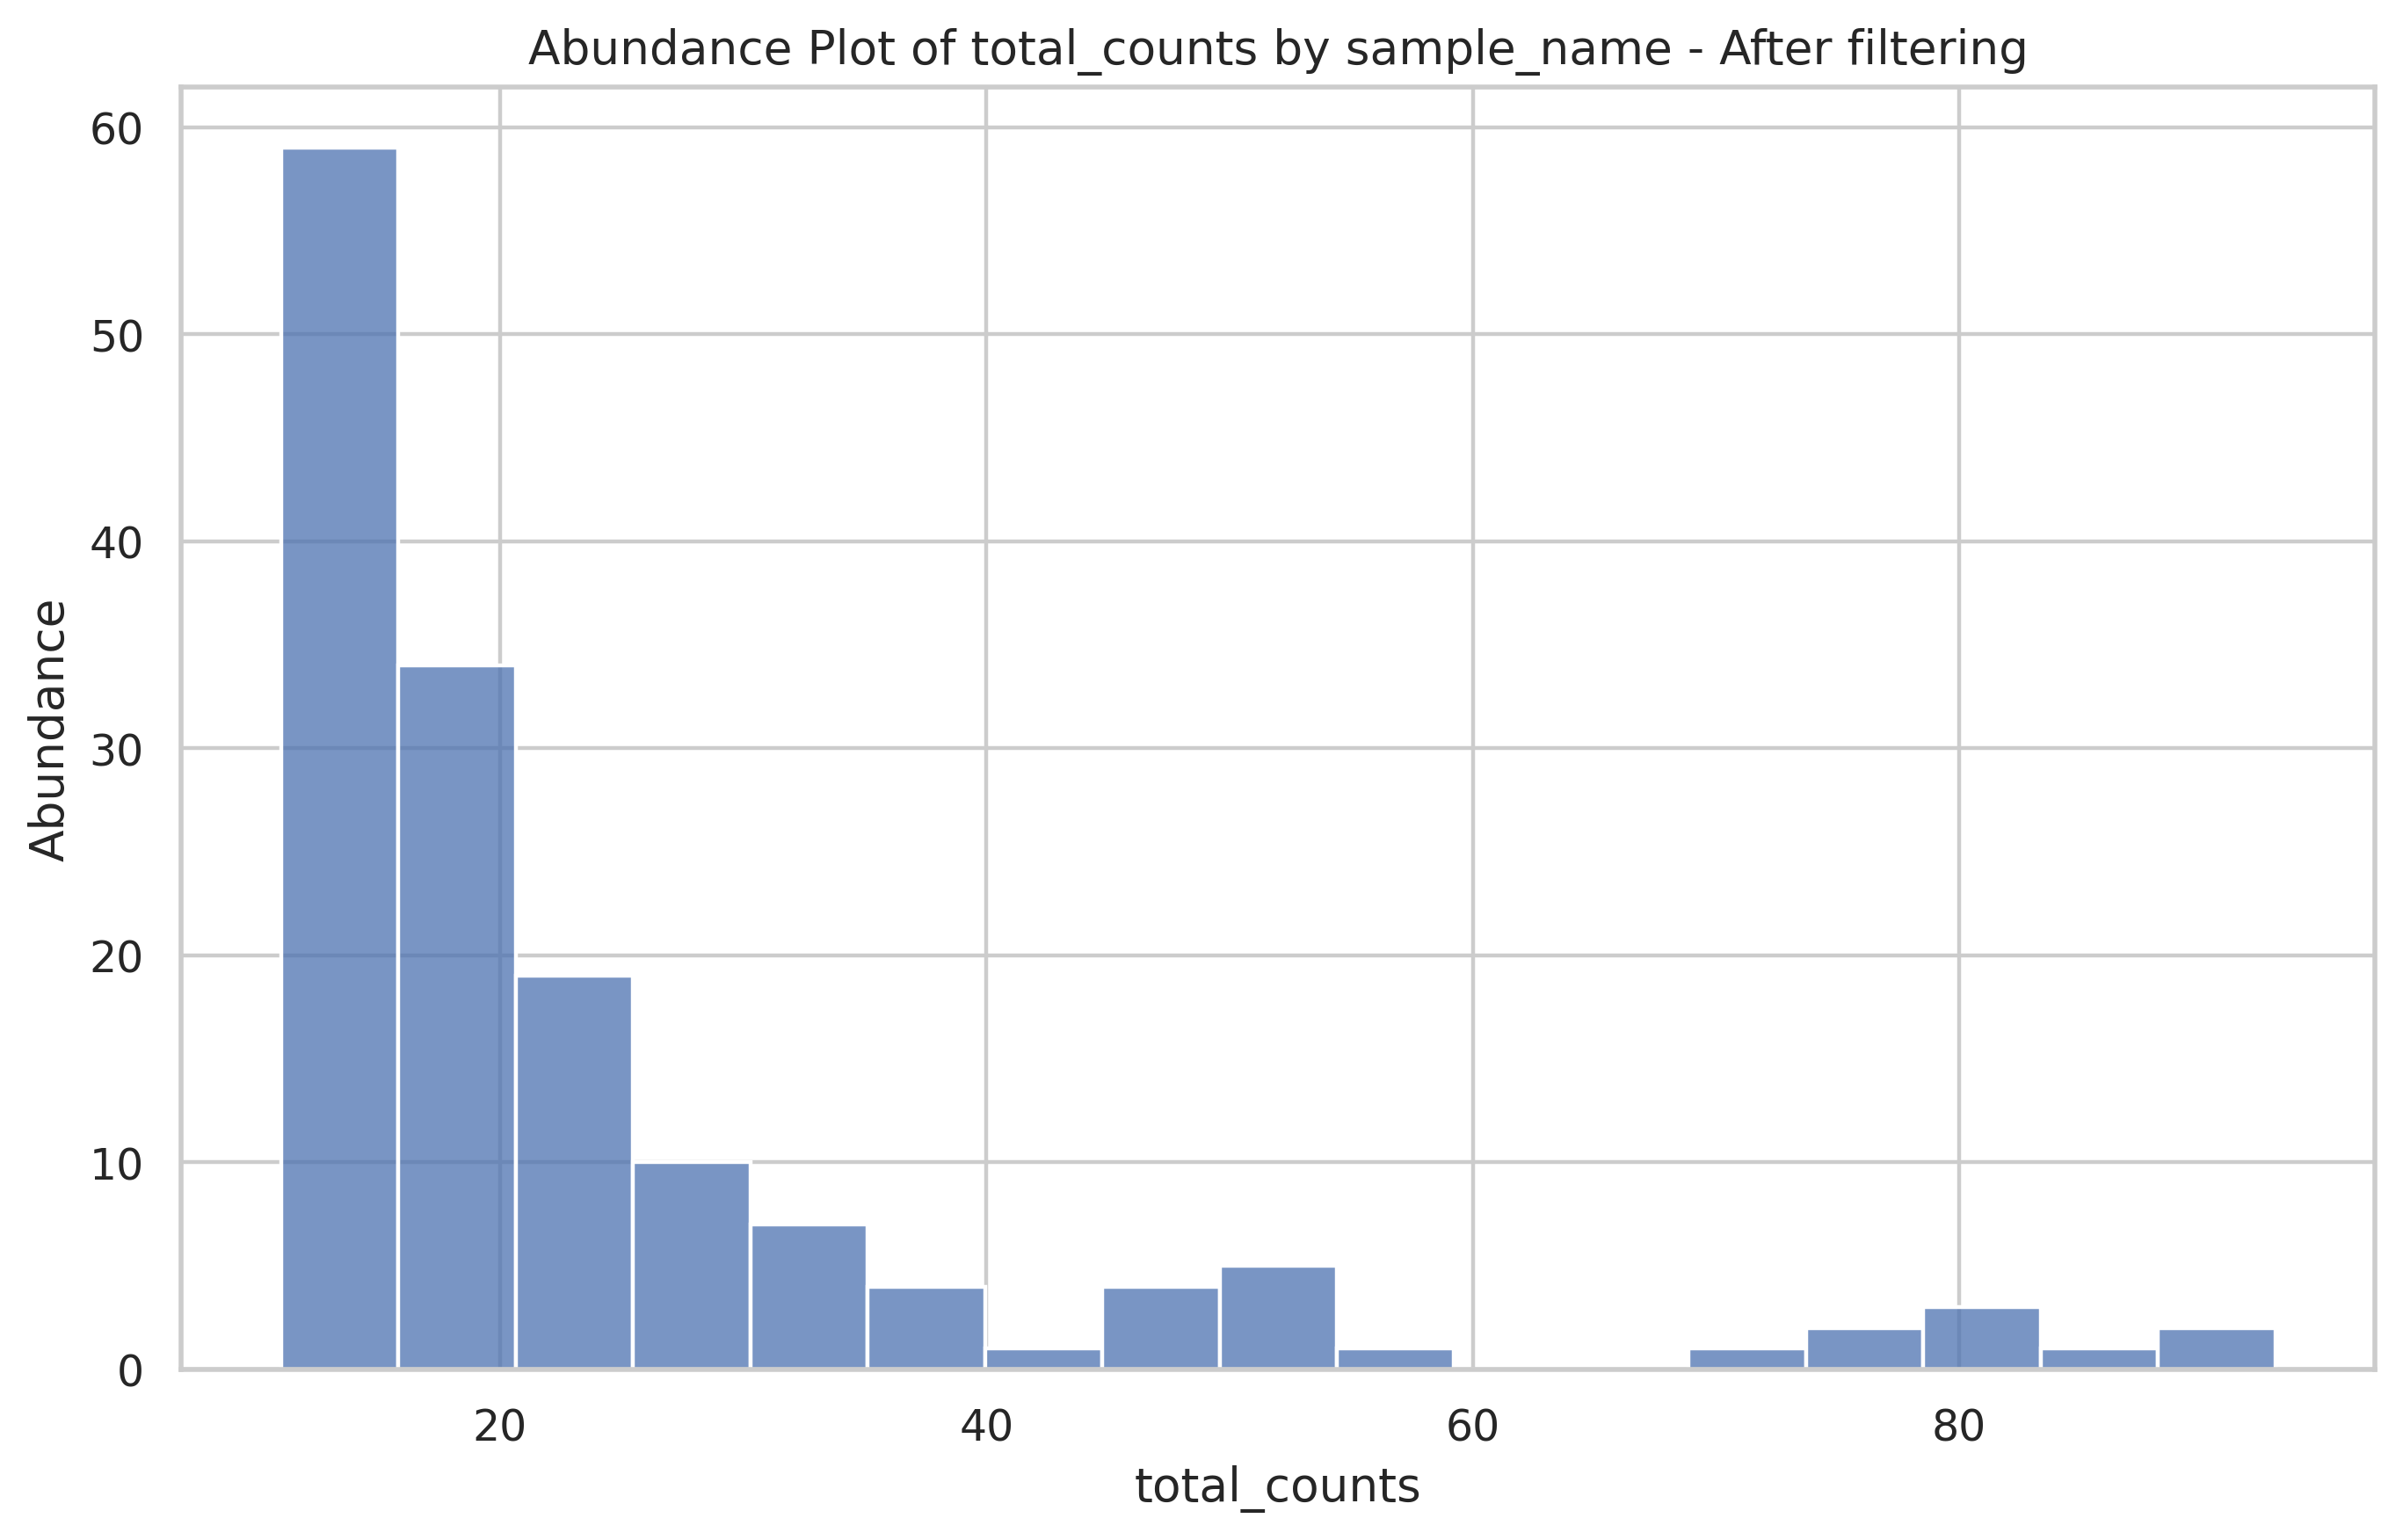

In [43]:
sb.set(style = "whitegrid")
covariate_to_visualize = 'total_counts'

plt.figure(figsize = (10, 6))
sb.histplot(data = filtered_object.obs, x = covariate_to_visualize, stat = 'count', common_norm = False)
plt.xlabel(covariate_to_visualize)
plt.ylabel('Abundance')
plt.title(f'Abundance Plot of {covariate_to_visualize} by sample_name - After filtering')
plt.show()

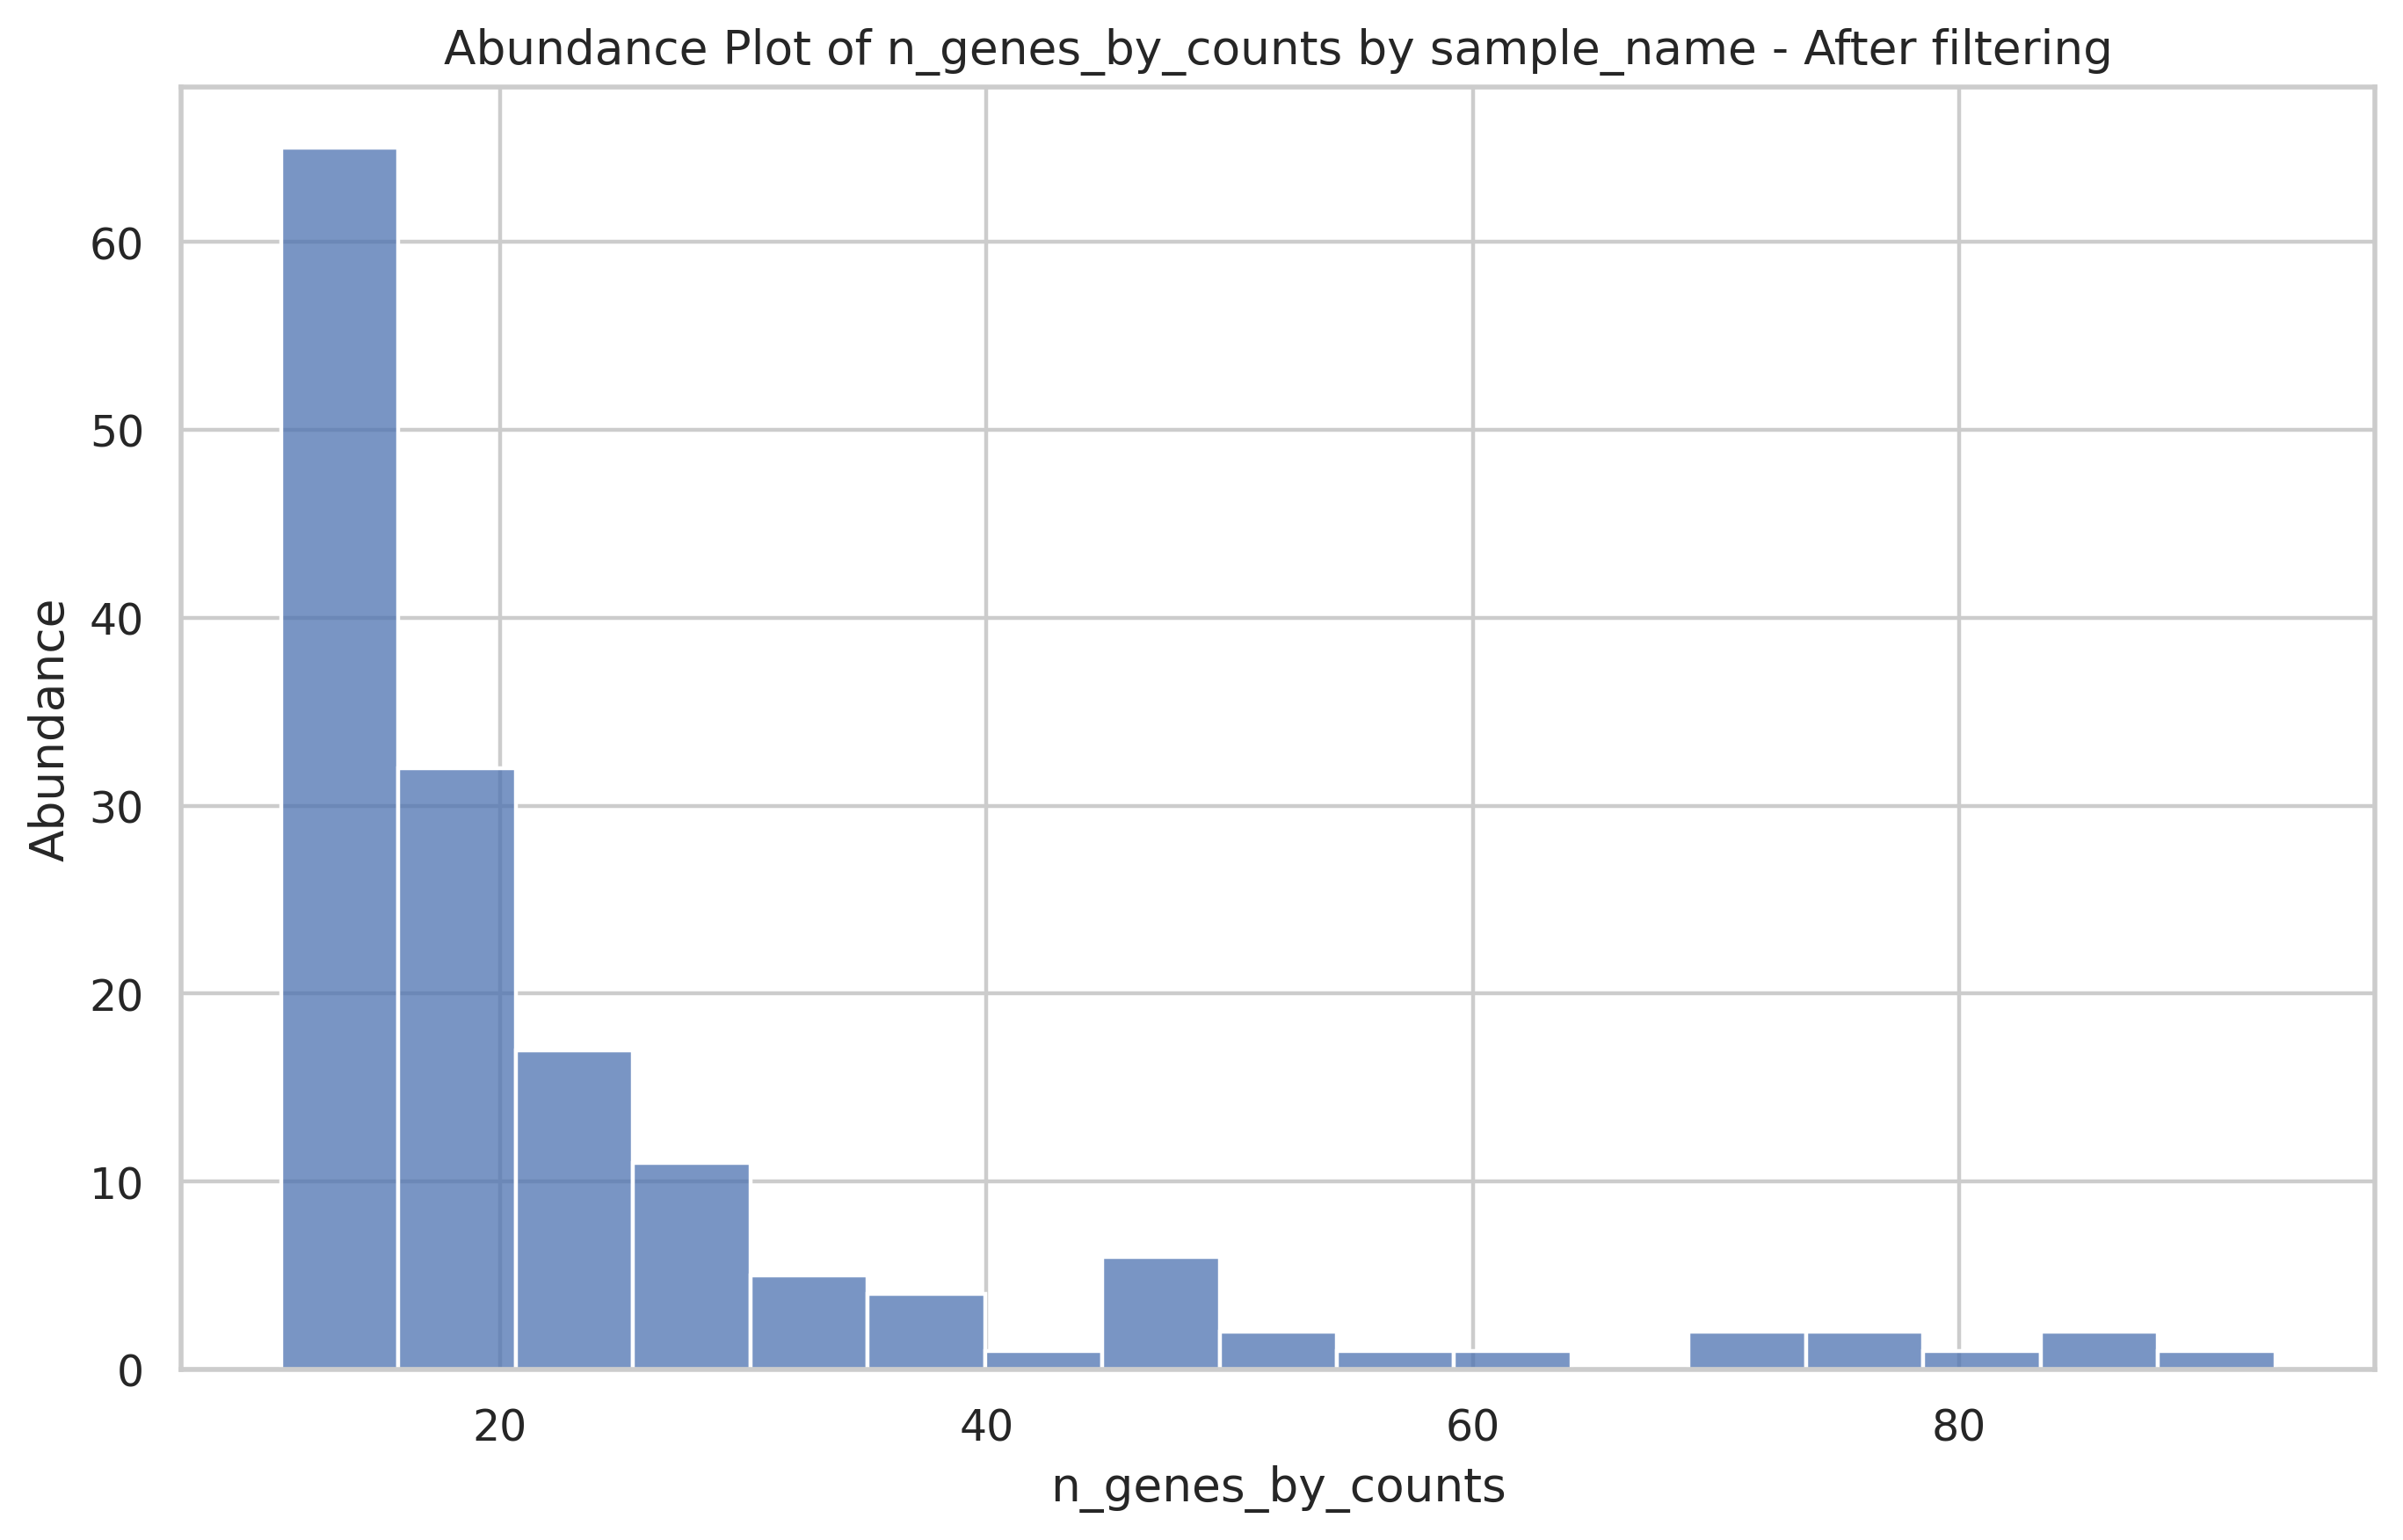

In [44]:
sb.set(style = "whitegrid")
covariate_to_visualize = 'n_genes_by_counts'

plt.figure(figsize = (10, 6))
sb.histplot(data = filtered_object.obs, x = covariate_to_visualize, stat = 'count', common_norm = False)
plt.xlabel(covariate_to_visualize)
plt.ylabel('Abundance')
plt.title(f'Abundance Plot of {covariate_to_visualize} by sample_name - After filtering')
plt.show()

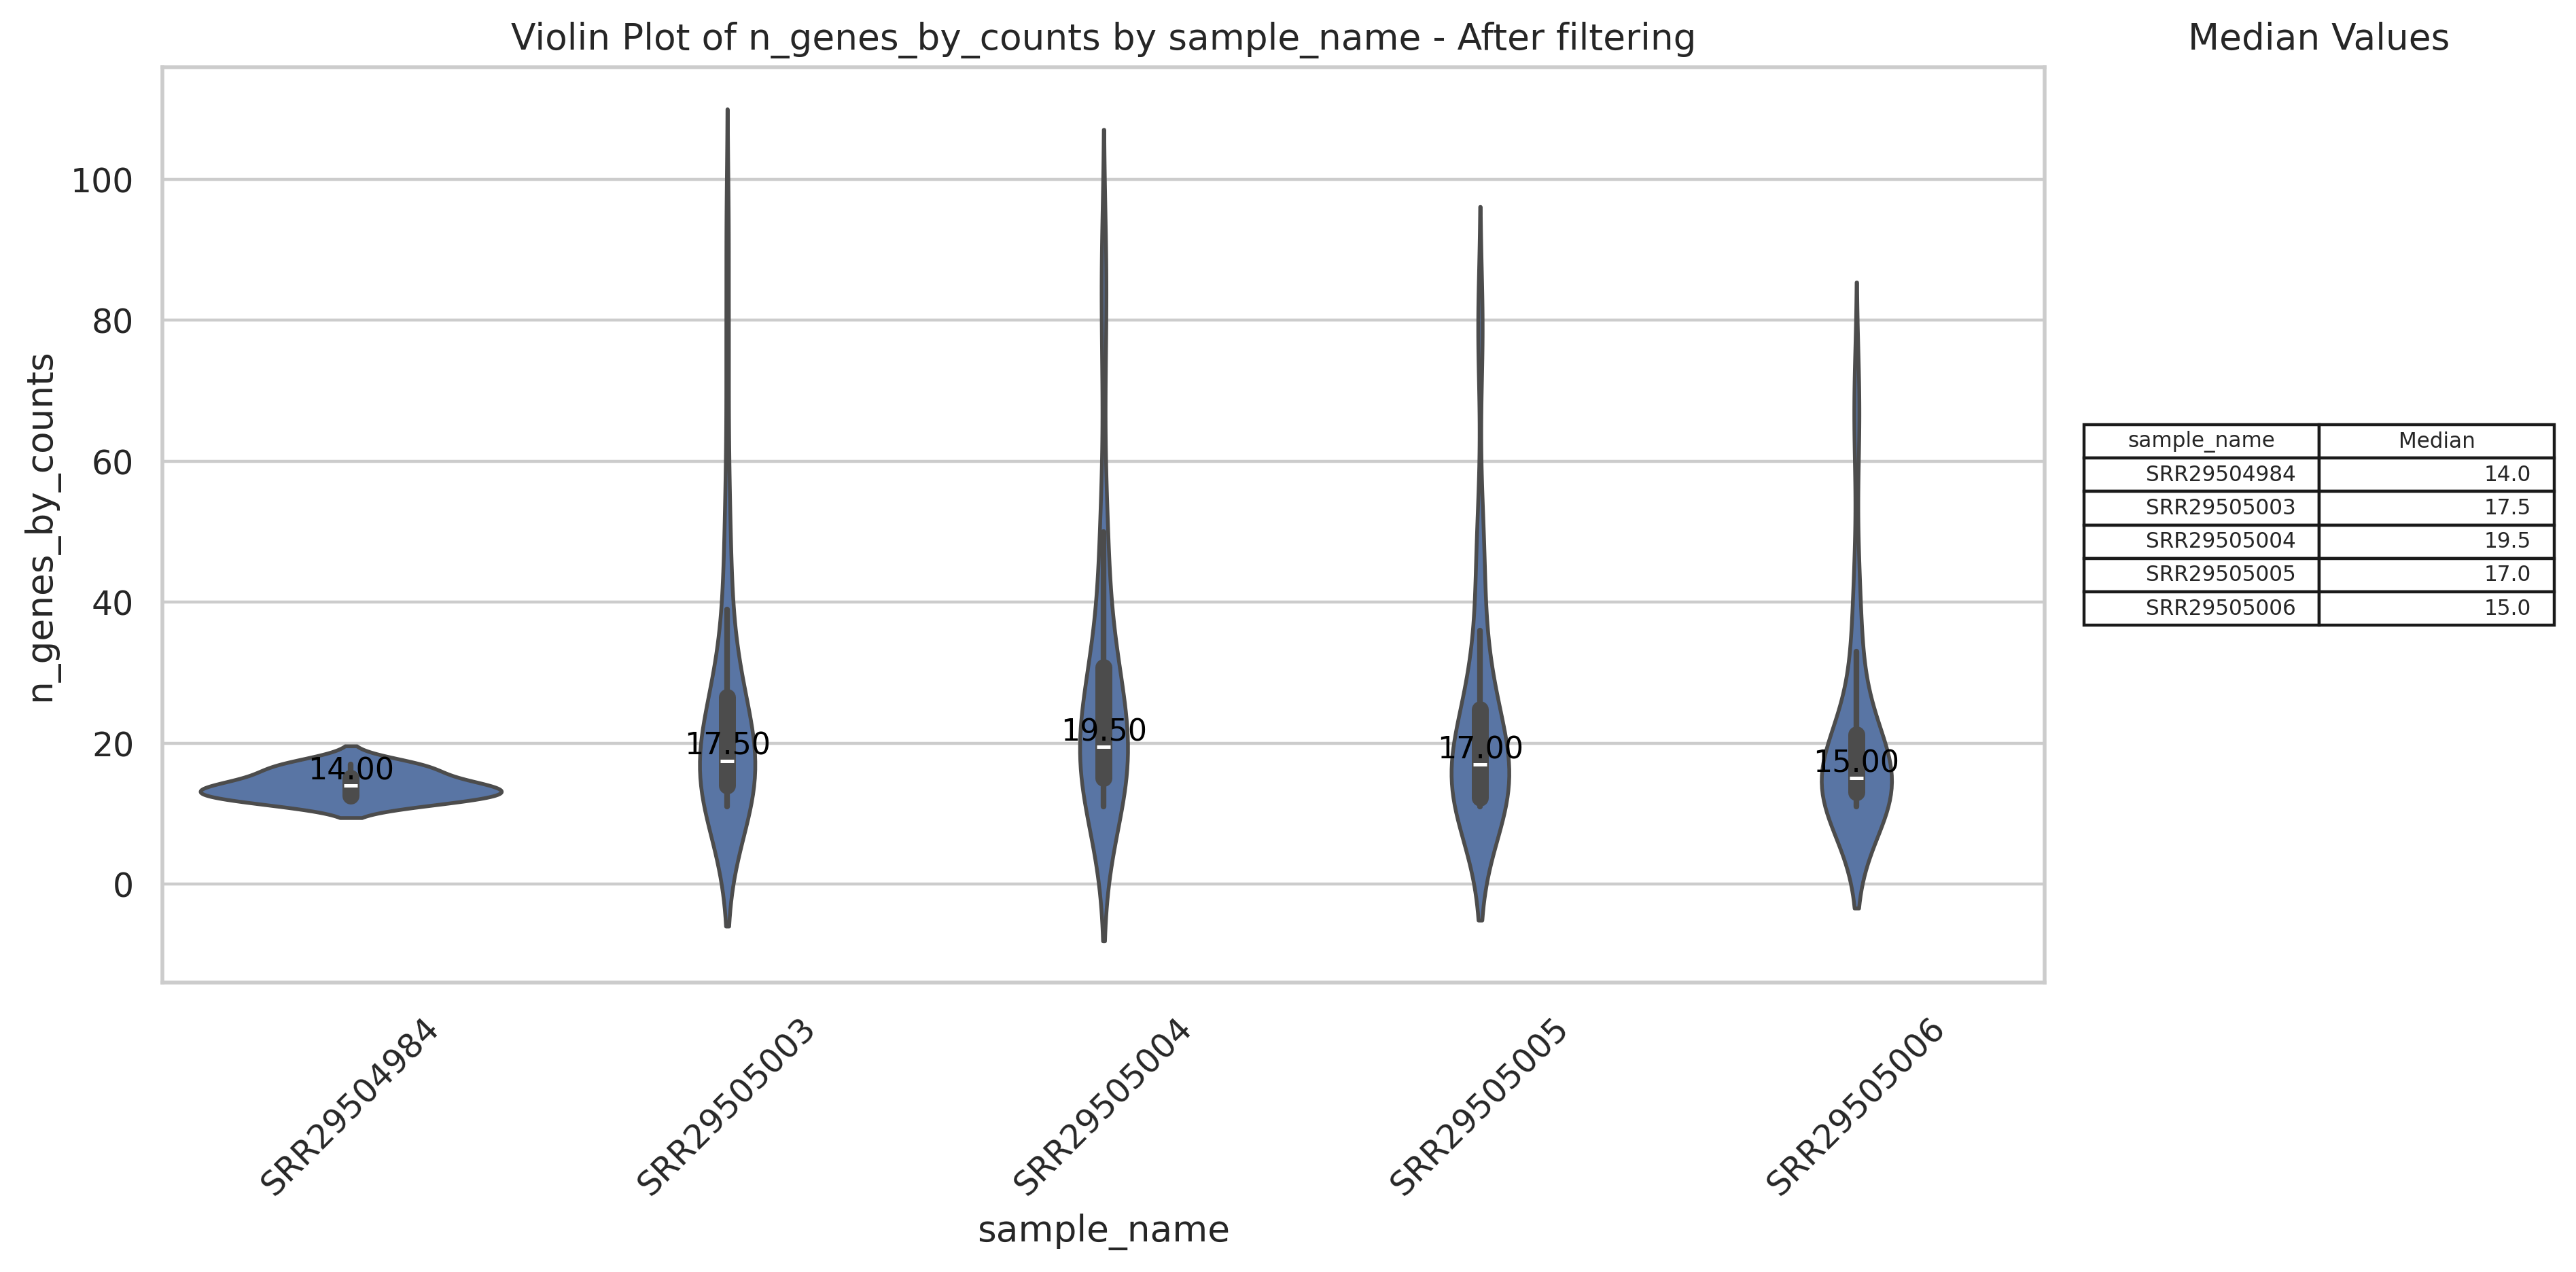

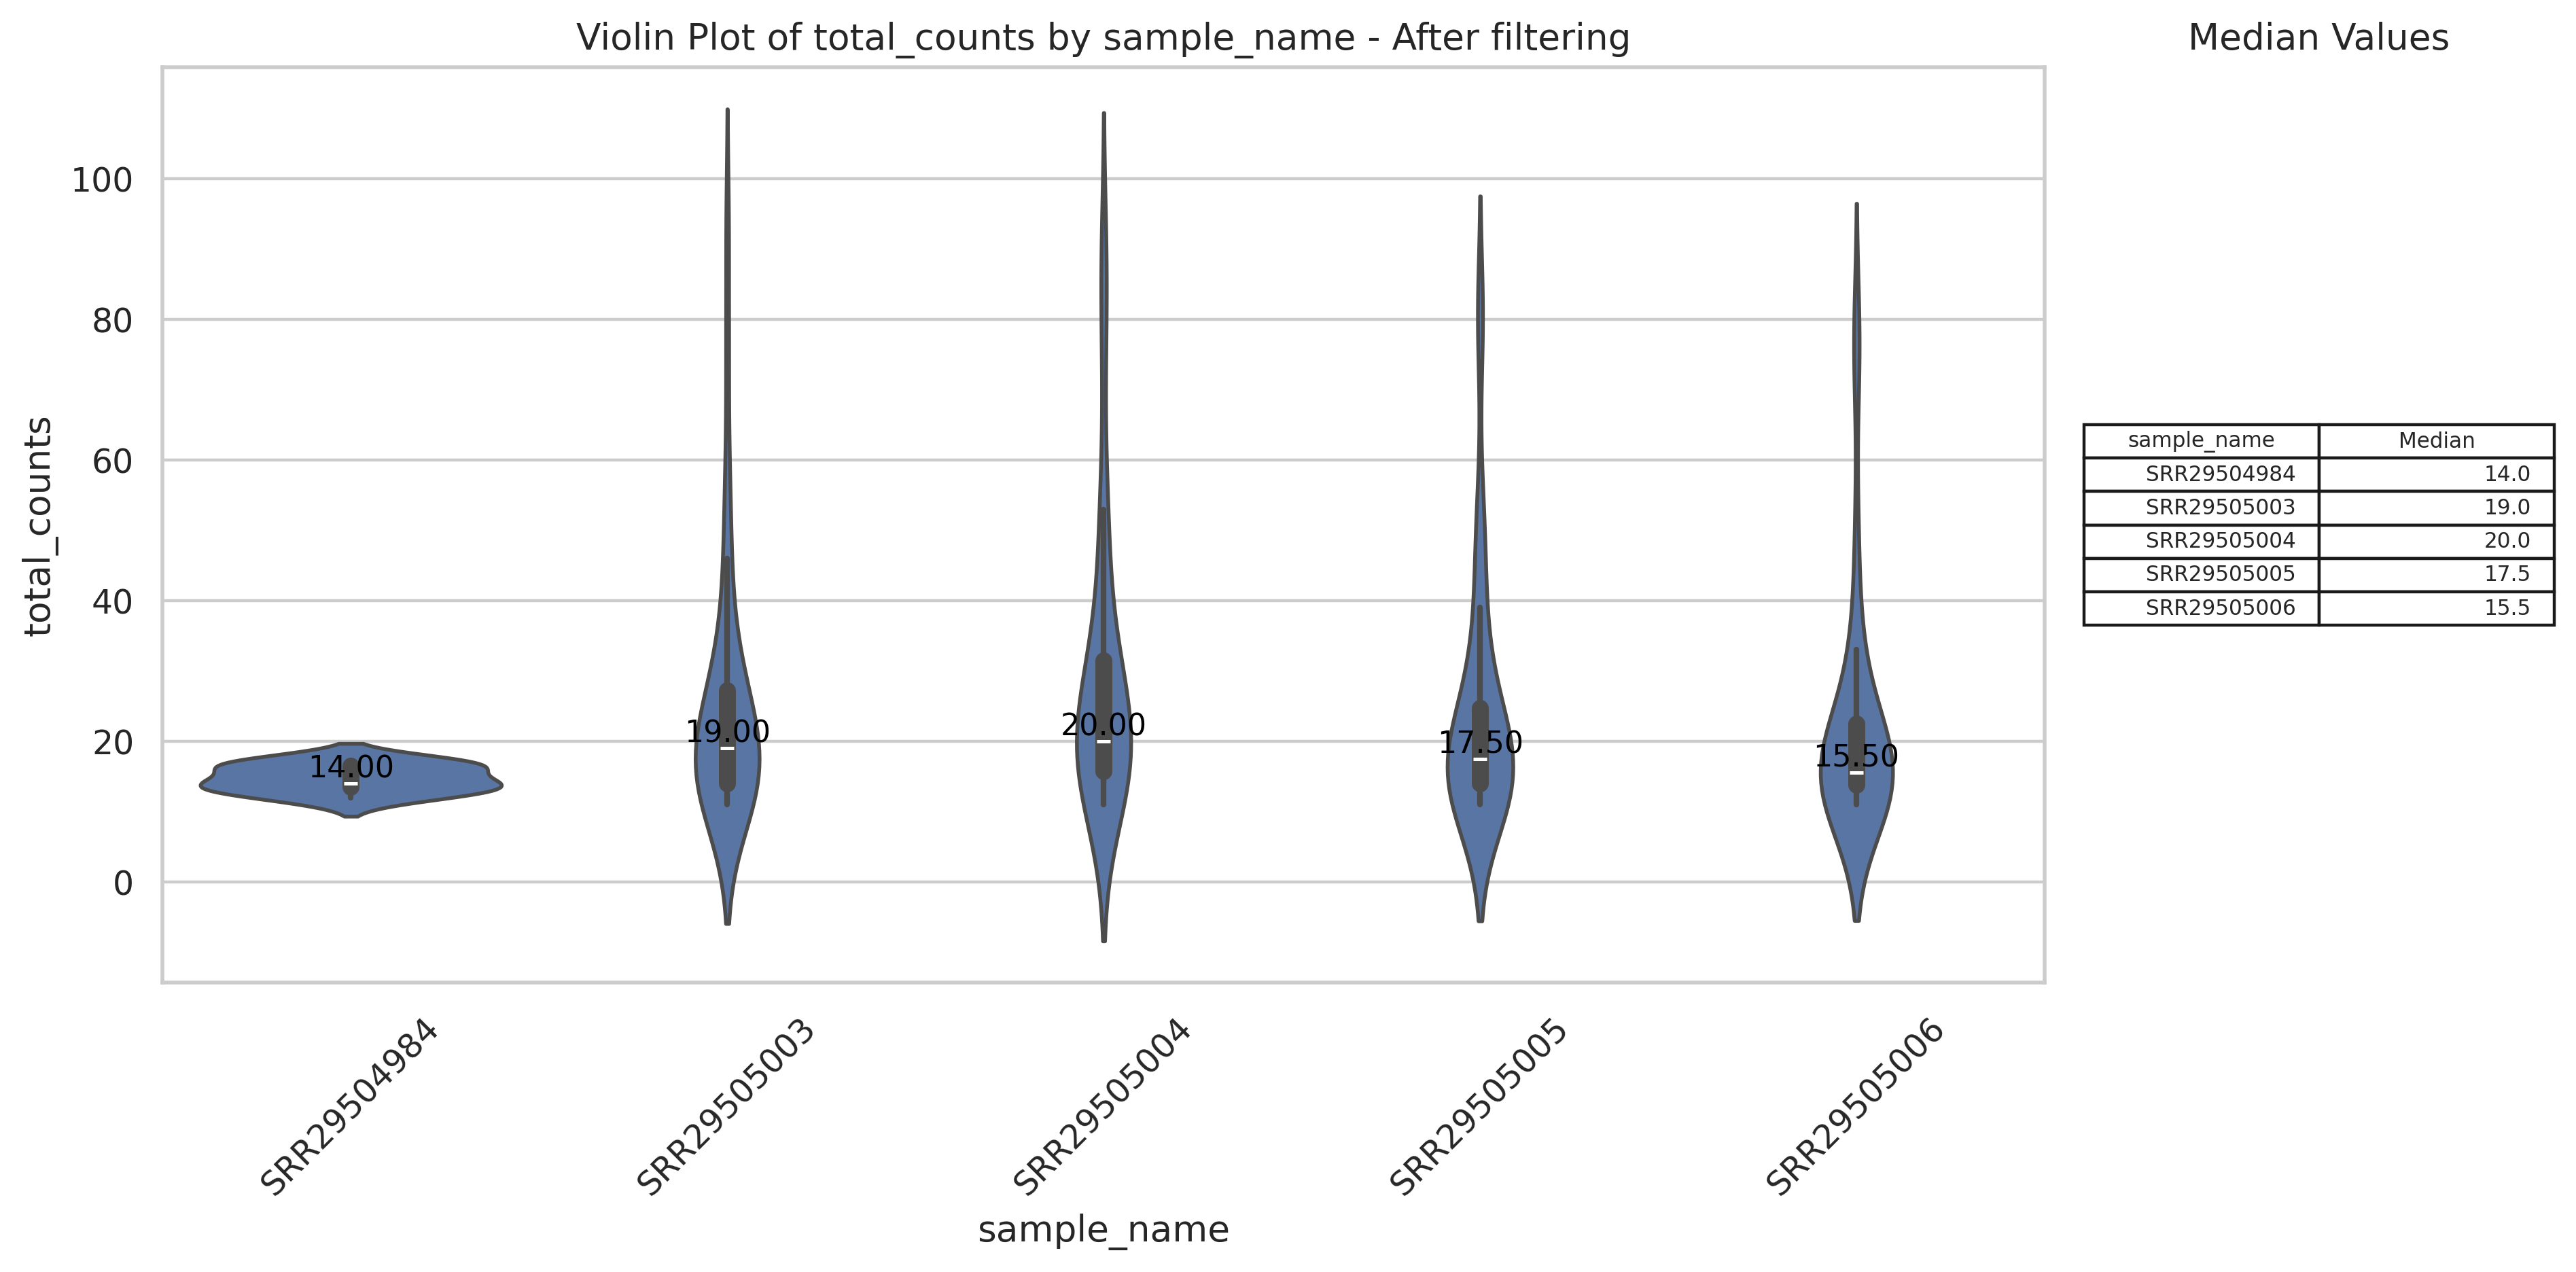

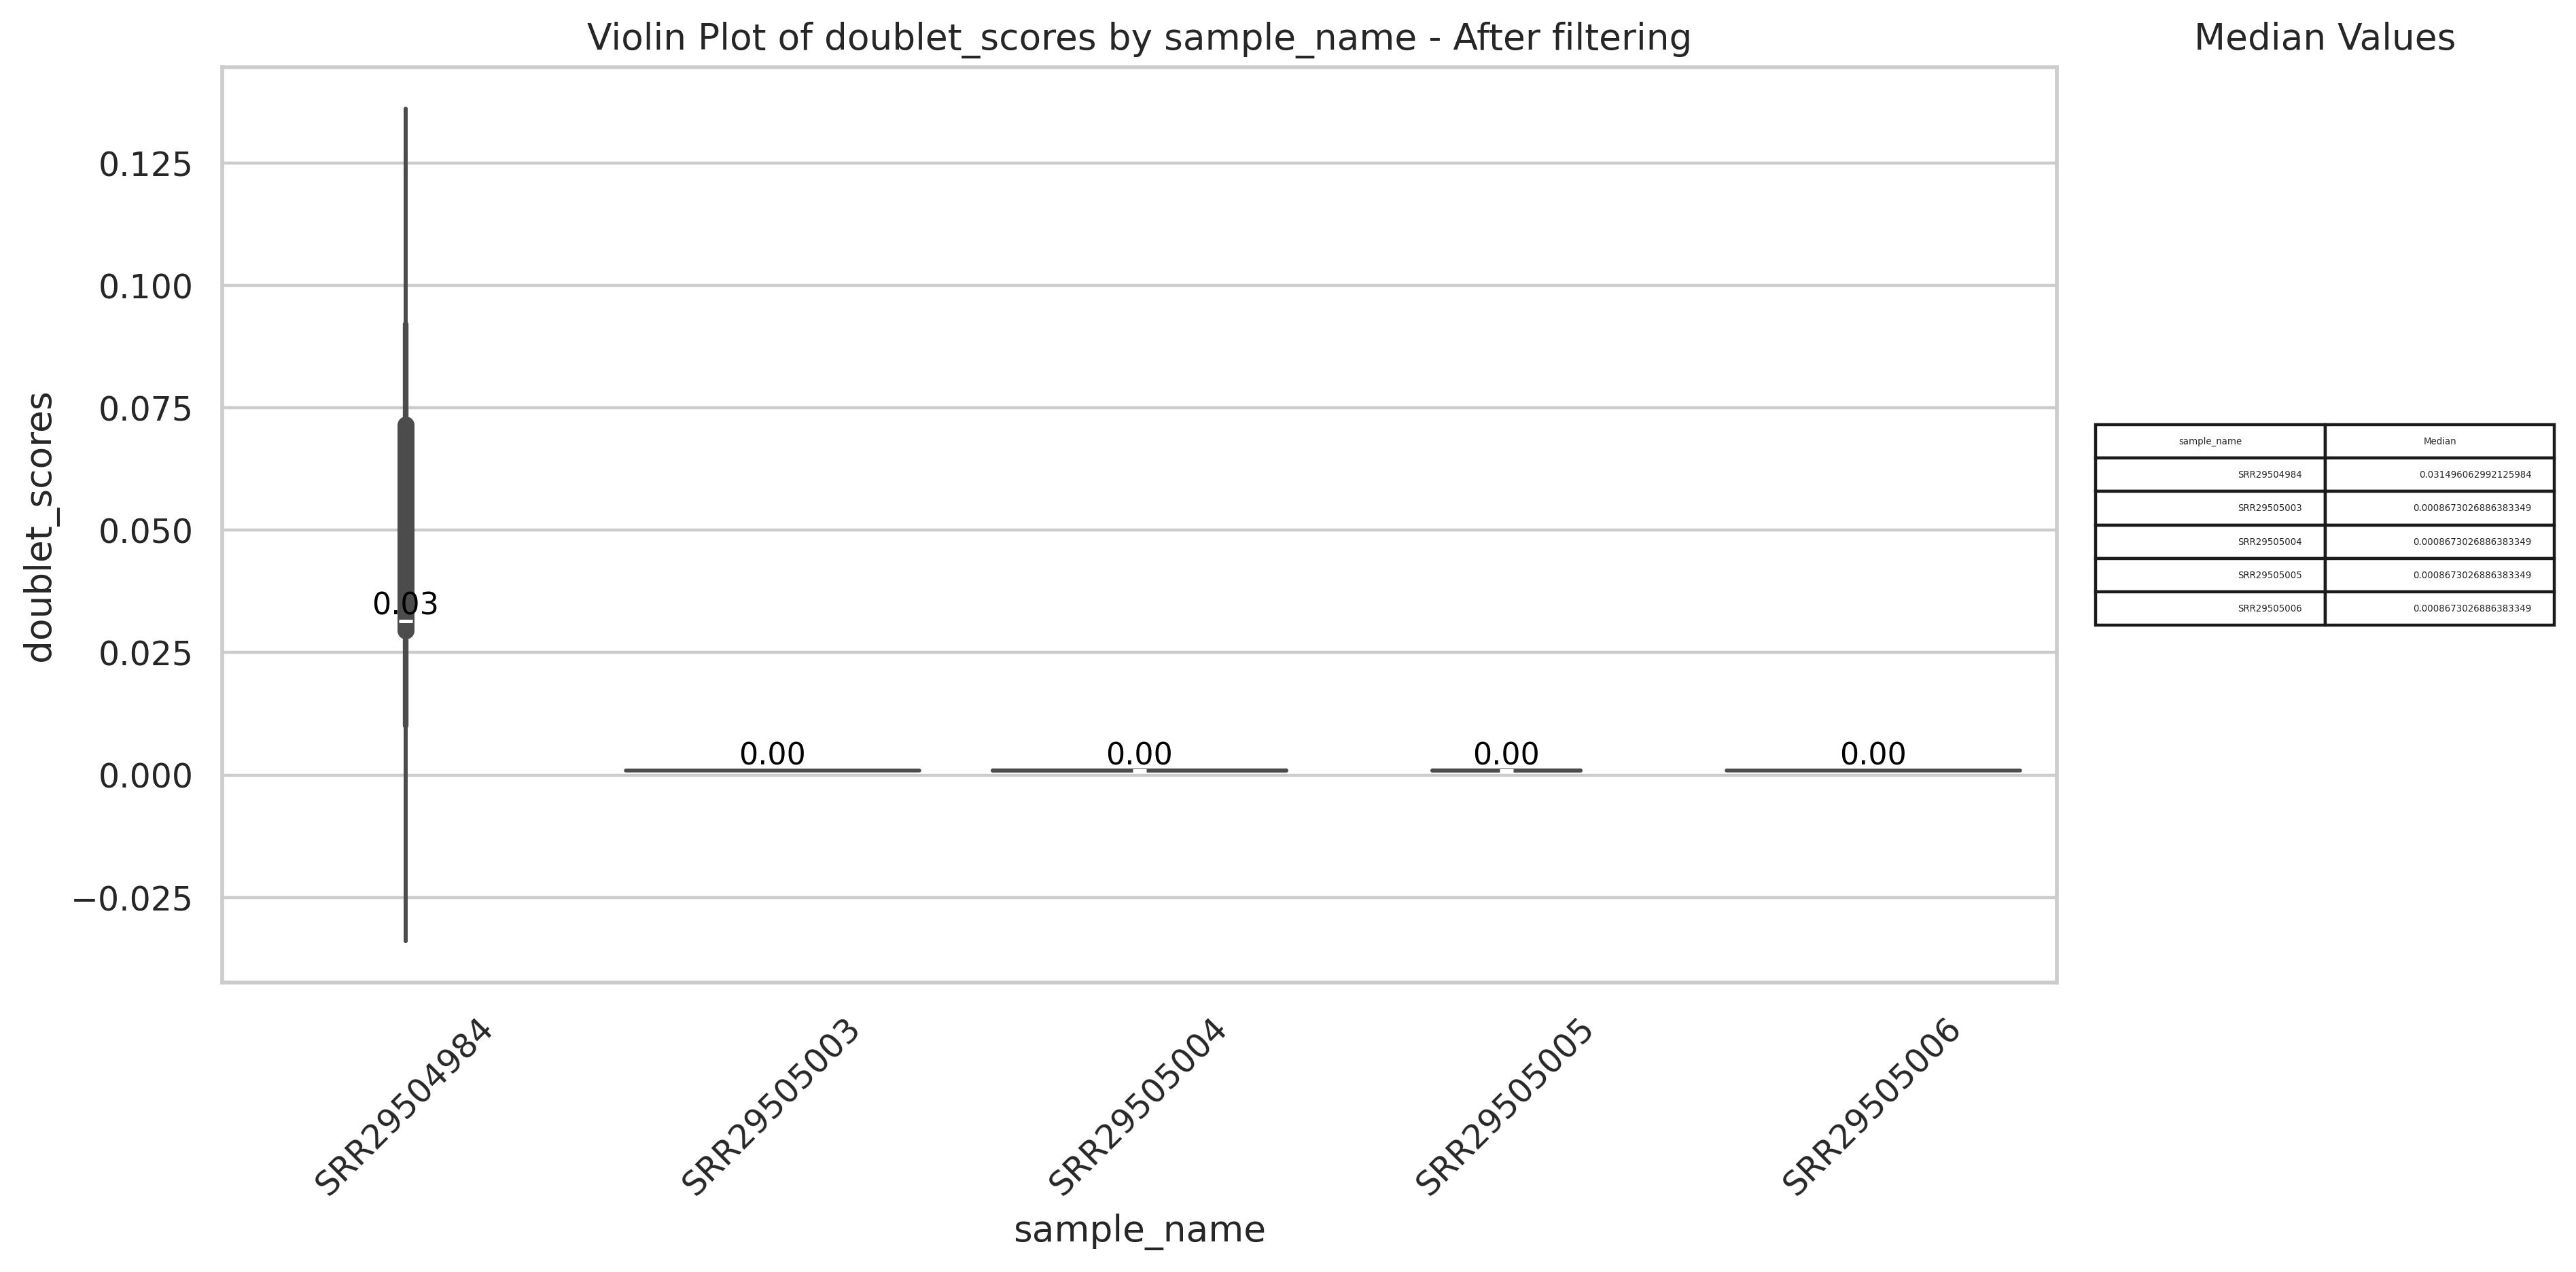

In [45]:
variables = 'n_genes_by_counts', 'total_counts', 'doublet_scores'

for var in variables:

    fig, ax = plt.subplots(figsize=(12, 6), ncols=2, gridspec_kw={'width_ratios': [4, 1]})

    sb.violinplot(data=filtered_object.obs, x='sample_name', y=var, ax=ax[0])
   
    medians = filtered_object.obs.groupby('sample_name')[var].median()

    for sample_name, median in medians.items():
        ax[0].text(sample_name, median, f'{median:.2f}', ha='center', va='bottom', color='black', fontsize=10)
    
    ax[0].set_title(f'Violin Plot of {var} by sample_name - After filtering')
    ax[0].set_xlabel('sample_name')
    ax[0].set_ylabel(var)
    ax[0].tick_params(axis='x', rotation=45)

    median_df = pd.DataFrame({'sample_name': medians.index, 'Median': medians.values})

    ax[1].axis('off')
    ax[1].table(cellText=median_df.values, colLabels=median_df.columns, loc='center')
    ax[1].set_title('Median Values')
    
    plt.tight_layout()
    plt.show()

## Data Export

In [46]:
filtered_object.raw = filtered_object.copy()

filtered_object.layers['raw_counts'] = filtered_object.X.copy()

filtered_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(filtered_object, inplace = False)["X"]
)

filtered_object

normalizing counts per cell
    finished (0:00:00)


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 153 × 693
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_chrY'
    var: 'n_counts', 'ensembl', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'chromosome'
    layers: 'raw_counts', 'sqrt_norm'

In [47]:
filtered_object.obs['sample_name'].value_counts()

sample_name
SRR29505003    40
SRR29505005    38
SRR29505004    36
SRR29505006    32
SRR29504984     7
Name: count, dtype: int64

In [48]:
filtered_object.var.dtypes

n_counts                 float64
ensembl                   object
gene_name                 object
mt                          bool
ribo                        bool
n_cells_by_counts          int64
mean_counts              float64
log1p_mean_counts        float64
pct_dropout_by_counts    float64
total_counts             float64
log1p_total_counts       float64
chromosome                object
dtype: object

In [49]:
filtered_object.var['mt'].value_counts()

mt
False    693
Name: count, dtype: int64

In [50]:
filtered_object.var['mt'] = filtered_object.var['mt'].astype(str)

In [51]:
print(filtered_object.var.dtypes)

n_counts                 float64
ensembl                   object
gene_name                 object
mt                        object
ribo                        bool
n_cells_by_counts          int64
mean_counts              float64
log1p_mean_counts        float64
pct_dropout_by_counts    float64
total_counts             float64
log1p_total_counts       float64
chromosome                object
dtype: object


In [52]:
filtered_object.var = filtered_object.var.rename(columns={'gene_name': 'gene_symbol'})
filtered_object.var = filtered_object.var.reset_index()
filtered_object.var

,gene_name,n_counts,ensembl,gene_symbol,mt,ribo,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,chromosome
0,TENM2,10.0,ENSG00000145934,TENM2,False,False,9,0.005485,0.005470,99.506308,10.0,2.397895,5
1,SDK1,14.0,ENSG00000146555,SDK1,False,False,14,0.007680,0.007650,99.232035,14.0,2.708050,7
2,CNTNAP2,13.0,ENSG00000174469,CNTNAP2,False,False,12,0.007131,0.007106,99.341744,13.0,2.639057,7
3,nan,11.0,ENSG00000288098,NaN,False,False,11,0.006034,0.006016,99.396599,11.0,2.484907,X
4,SDK1,14.0,ENSG00000146555,SDK1,False,False,13,0.007680,0.007650,99.286890,14.0,2.708050,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,TALAM1,11.0,ENSG00000289740,TALAM1,False,False,11,0.006034,0.006016,99.396599,11.0,2.484907,11
689,GRID2,13.0,ENSG00000152208,GRID2,False,False,13,0.007131,0.007106,99.286890,13.0,2.639057,4
690,EYS,10.0,ENSG00000188107,EYS,False,False,10,0.005485,0.005470,99.451454,10.0,2.397895,6
691,CNTNAP2,10.0,ENSG00000174469,CNTNAP2,False,False,10,0.005485,0.005470,99.451454,10.0,2.397895,7


In [53]:
filtered_object.raw.var.index.name = 'gene_id'  
filtered_object.var

,gene_name,n_counts,ensembl,gene_symbol,mt,ribo,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,chromosome
0,TENM2,10.0,ENSG00000145934,TENM2,False,False,9,0.005485,0.005470,99.506308,10.0,2.397895,5
1,SDK1,14.0,ENSG00000146555,SDK1,False,False,14,0.007680,0.007650,99.232035,14.0,2.708050,7
2,CNTNAP2,13.0,ENSG00000174469,CNTNAP2,False,False,12,0.007131,0.007106,99.341744,13.0,2.639057,7
3,nan,11.0,ENSG00000288098,NaN,False,False,11,0.006034,0.006016,99.396599,11.0,2.484907,X
4,SDK1,14.0,ENSG00000146555,SDK1,False,False,13,0.007680,0.007650,99.286890,14.0,2.708050,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,TALAM1,11.0,ENSG00000289740,TALAM1,False,False,11,0.006034,0.006016,99.396599,11.0,2.484907,11
689,GRID2,13.0,ENSG00000152208,GRID2,False,False,13,0.007131,0.007106,99.286890,13.0,2.639057,4
690,EYS,10.0,ENSG00000188107,EYS,False,False,10,0.005485,0.005470,99.451454,10.0,2.397895,6
691,CNTNAP2,10.0,ENSG00000174469,CNTNAP2,False,False,10,0.005485,0.005470,99.451454,10.0,2.397895,7


In [54]:
filtered_object.write_h5ad(f'../ncbi_sra/data/PRJNA1127309_sra_filtered_sk_{timestamp}.h5ad')